## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =7,5
rcParams['font.size'] = 11.0
from matplotlib import font_manager as fm
import sklearn.feature_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Loading Data

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') 

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,5073-WXOYN,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.dtypes[df.dtypes=='object']

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

In [12]:
print('Column_Name  Count   %')
for attribute in df.columns:
    if(attribute!='SeniorCitizen' and attribute!='tenure' and attribute!='MonthlyCharges'):
        if((df.loc[df[attribute] == ' ']['customerID'].count())>=1):
            print(attribute+" ",df.loc[df[attribute] == ' ']['customerID'].count(),\
                  " ",((df.loc[df[attribute] == ' ']['customerID'].count())/len(df))*100)

Column_Name  Count   %
TotalCharges  11   0.1561834445548772


In [13]:
df['TotalCharges'].replace(" ",np.nan,inplace=True)
df.dropna(inplace=True)

In [14]:
df['TotalCharges']=df['TotalCharges'].astype('float')

In [15]:
for attribute in df.columns:
    if(attribute!='TotalCharges' and attribute!='tenure' and attribute!='MonthlyCharges' and attribute!='customerID'):
        print(attribute)
        print(df[attribute].unique())

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


In [16]:
df.drop(columns={'customerID'},inplace=True)

## Visualizing the existing Data

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "left". Falling back on "best"; valid locations are
	upper center
	upper left
	center right
	right
	best
	upper right
	lower right
	lower left
	center
	lower center
	center left

  % (loc, '\n\t'.join(self.codes)))


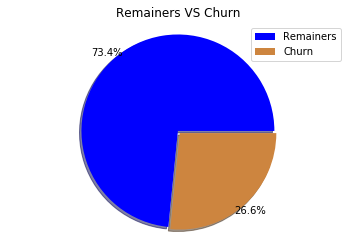

In [20]:
performance = [df[df['Churn'] == 'No']['Churn'].count(),\
               df[df['Churn'] == 'Yes']['Churn'].count()]

colors_list = ['b', 'peru']
explode_list = [0.03, 0] 


plt.pie([float(v) for v in performance],autopct='%1.1f%%',pctdistance=1.09,
         colors=colors_list,shadow=True,explode=explode_list)


plt.title('Remainers VS Churn', y=1) 


plt.legend(labels=['Remainers','Churn'], loc='left') 
plt.axis('Equal') 
plt.show()

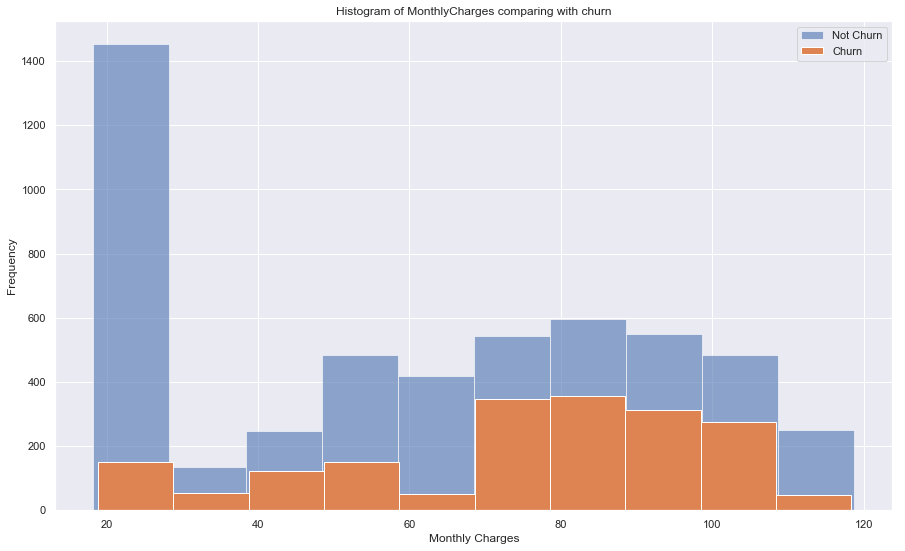

In [94]:
sns.set()
df[df['Churn'] == 'No']['MonthlyCharges'].plot(kind='hist',alpha=0.6, figsize=(15, 9), label = 'Not Churn')
df[df['Churn'] == 'Yes']['MonthlyCharges'].plot(kind='hist', figsize=(15, 9), label = 'Churn')
plt.legend()
plt.title('Histogram of MonthlyCharges comparing with churn')
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

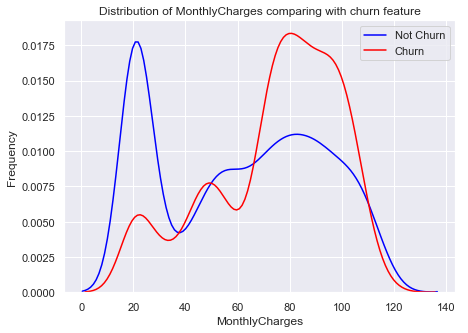

In [961]:
g=sns.distplot(df[df['Churn'] == 'No']['MonthlyCharges'],hist=False, label='Not Churn', 
                 color='blue')

g=sns.distplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], hist=False, label='Churn', 
                 color='Red')

g.set_xlabel("MonthlyCharges")
g.set_ylabel("Frequency")
plt.title('Distribution of MonthlyCharges comparing with churn feature')
g = g.legend(["Not Churn","Churn"])
plt.show()

## When Monthly charges are around 80 - Higher is the Churn Rate.

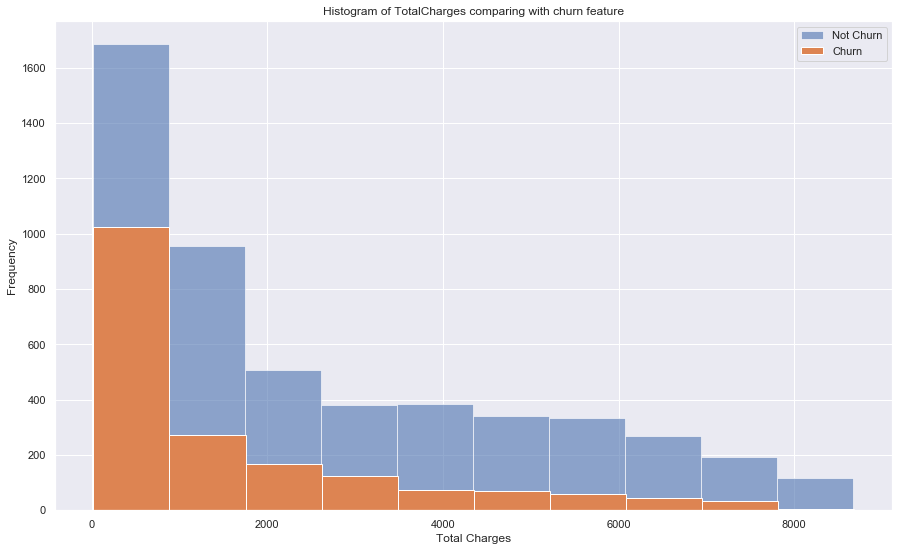

In [93]:
df[df['Churn'] == 'No']['TotalCharges'].plot(kind='hist',alpha=0.6, figsize=(15, 9),label='Not Churn')
df[df['Churn'] == 'Yes']['TotalCharges'].plot(kind='hist', figsize=(15, 9),label='Churn')
plt.legend()
plt.title('Histogram of TotalCharges comparing with churn feature')
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.show()

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


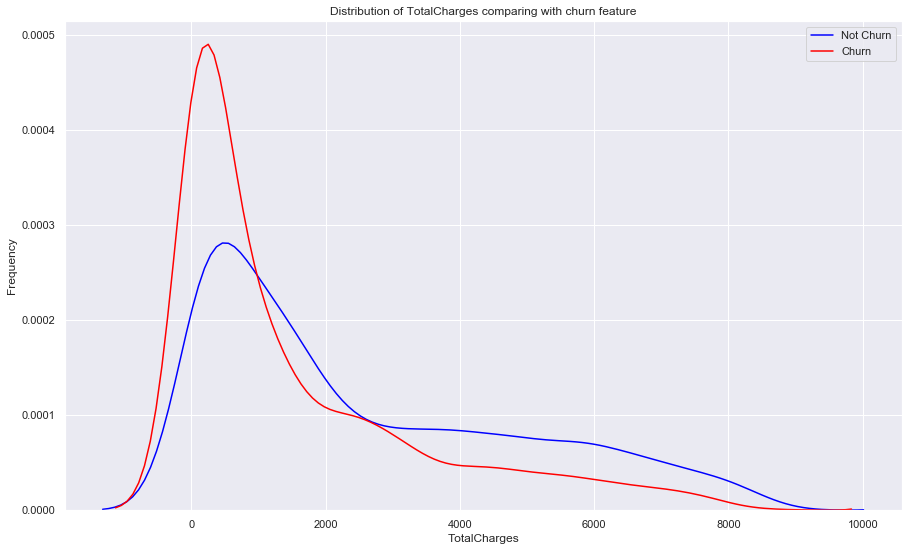

In [73]:
g=sns.distplot(df[df['Churn'] == 'No']['TotalCharges'],hist=False, label='Not Churn', 
                 color='blue')

g=sns.distplot(df[df['Churn'] == 'Yes']['TotalCharges'], hist=False, label='Churn', 
                 color='Red')
g.set_xlabel("TotalCharges")
g.set_ylabel("Frequency")
plt.title('Distribution of TotalCharges comparing with churn feature')
g = g.legend(["Not Churn","Churn"])
plt.show()

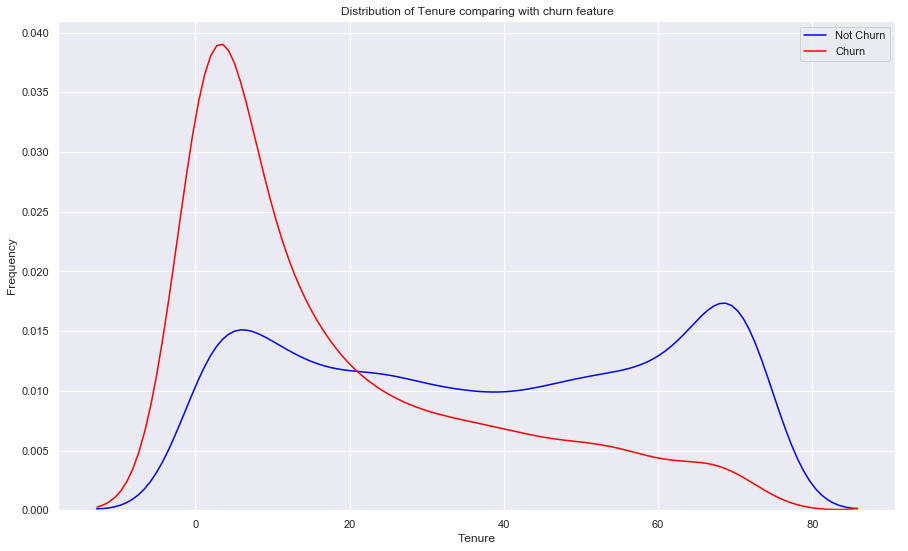

In [197]:
g=sns.distplot(df[df['Churn'] == 'No']['tenure'],hist=False, label='Not Churn', 
                 color='blue')

g=sns.distplot(df[df['Churn'] == 'Yes']['tenure'], hist=False, label='Churn', 
                 color='Red')
g.set_xlabel("Tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of Tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])
plt.show()

In [79]:
df['tenure_bin']=pd.cut(df['tenure'], [0,6,12,18,24,30,36,42,48,54,60,66,72], labels=[0,6,12,18,24,30,36,42,48,54,60,66])
df['tenure_bin']=df['tenure_bin'].astype('int')

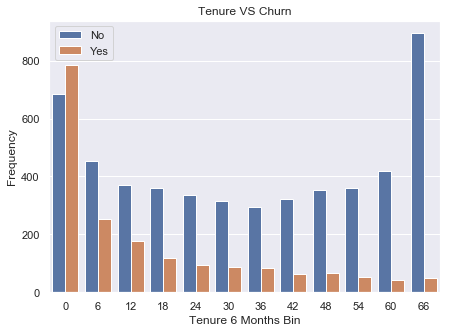

In [970]:
sns.countplot(x="tenure_bin", data=df,  hue='Churn')
plt.title('Tenure VS Churn')
plt.legend()
plt.xlabel("Tenure 6 Months Bin")
plt.ylabel("Frequency")
plt.show()

In [1165]:
mfinal

,Type,Accuracy,Precision,F1Score
0,Upsampled Random Forest,88.0,88.0,88.0
0,Logistic Regression,79.0,80.0,79.0
0,SVM,79.0,79.0,79.0
0,Random Forest,78.0,79.0,78.0


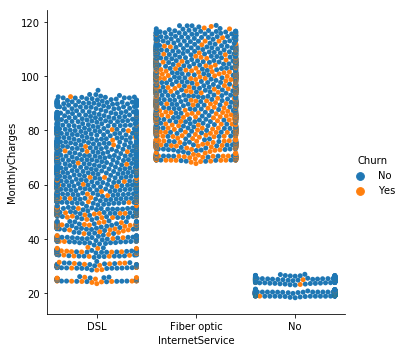

In [22]:
sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="swarm", data=df);

In [222]:
def get_percen(col1,col1_res,col2,datatype):
    if(datatype!='N'):
        x=(len(df.loc[(df[col1]==col1_res) & (df[col2]=='Yes')])/\
        len(df.loc[(df[col1]==col1_res)]))*100
        return str(round(x))+'%'
    else:
        x=(len(df.loc[(df[col1]<=col1_res) & (df[col2]=='Yes')])/\
        len(df.loc[(df[col1]<=col1_res)]))*100
        return str(round(x))+'%'

In [140]:
get_percen('tenure_bin',0,'Churn','N')

'53%'

In [141]:
get_percen('tenure_bin',6,'Churn','N')

'48%'

## Customers who were with this service provider for less than 12 months has the most churn percentage.

### * For the 1st 6 Months it is 53% of Churn.
### * For the 1st Year it is 48% of Churn.

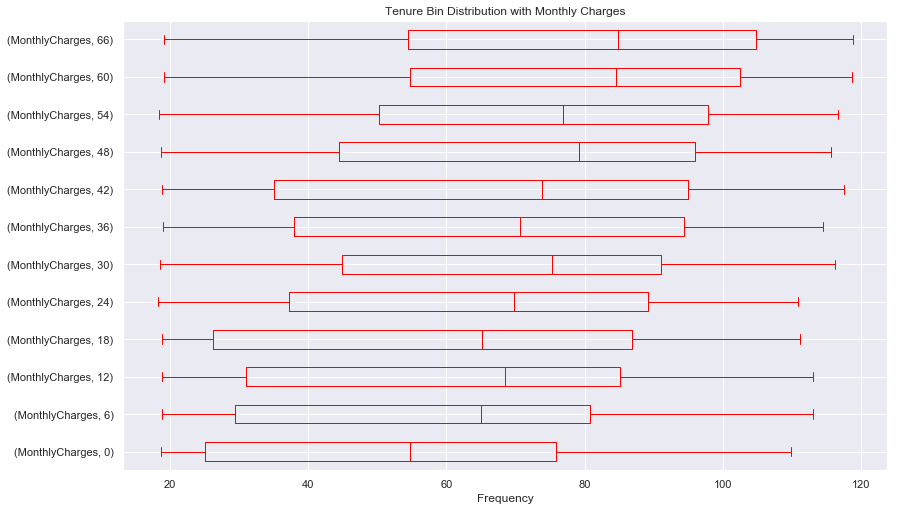

In [407]:
df.loc[(df['tenure_bin']==0) | (df['tenure_bin']==6)| (df['tenure_bin']==12) |\
       (df['tenure_bin']==18) | (df['tenure_bin']==24)| (df['tenure_bin']==30) |\
       (df['tenure_bin']==36) | (df['tenure_bin']==42)| (df['tenure_bin']==48) |\
       (df['tenure_bin']==54) | (df['tenure_bin']==60)| (df['tenure_bin']==66)\
      ][['tenure_bin','MonthlyCharges']].pivot\
(columns='tenure_bin').plot(kind='box',vert=False, color='red')
plt.title("Tenure Bin Distribution with Monthly Charges")
plt.xlabel('Frequency')
plt.show()

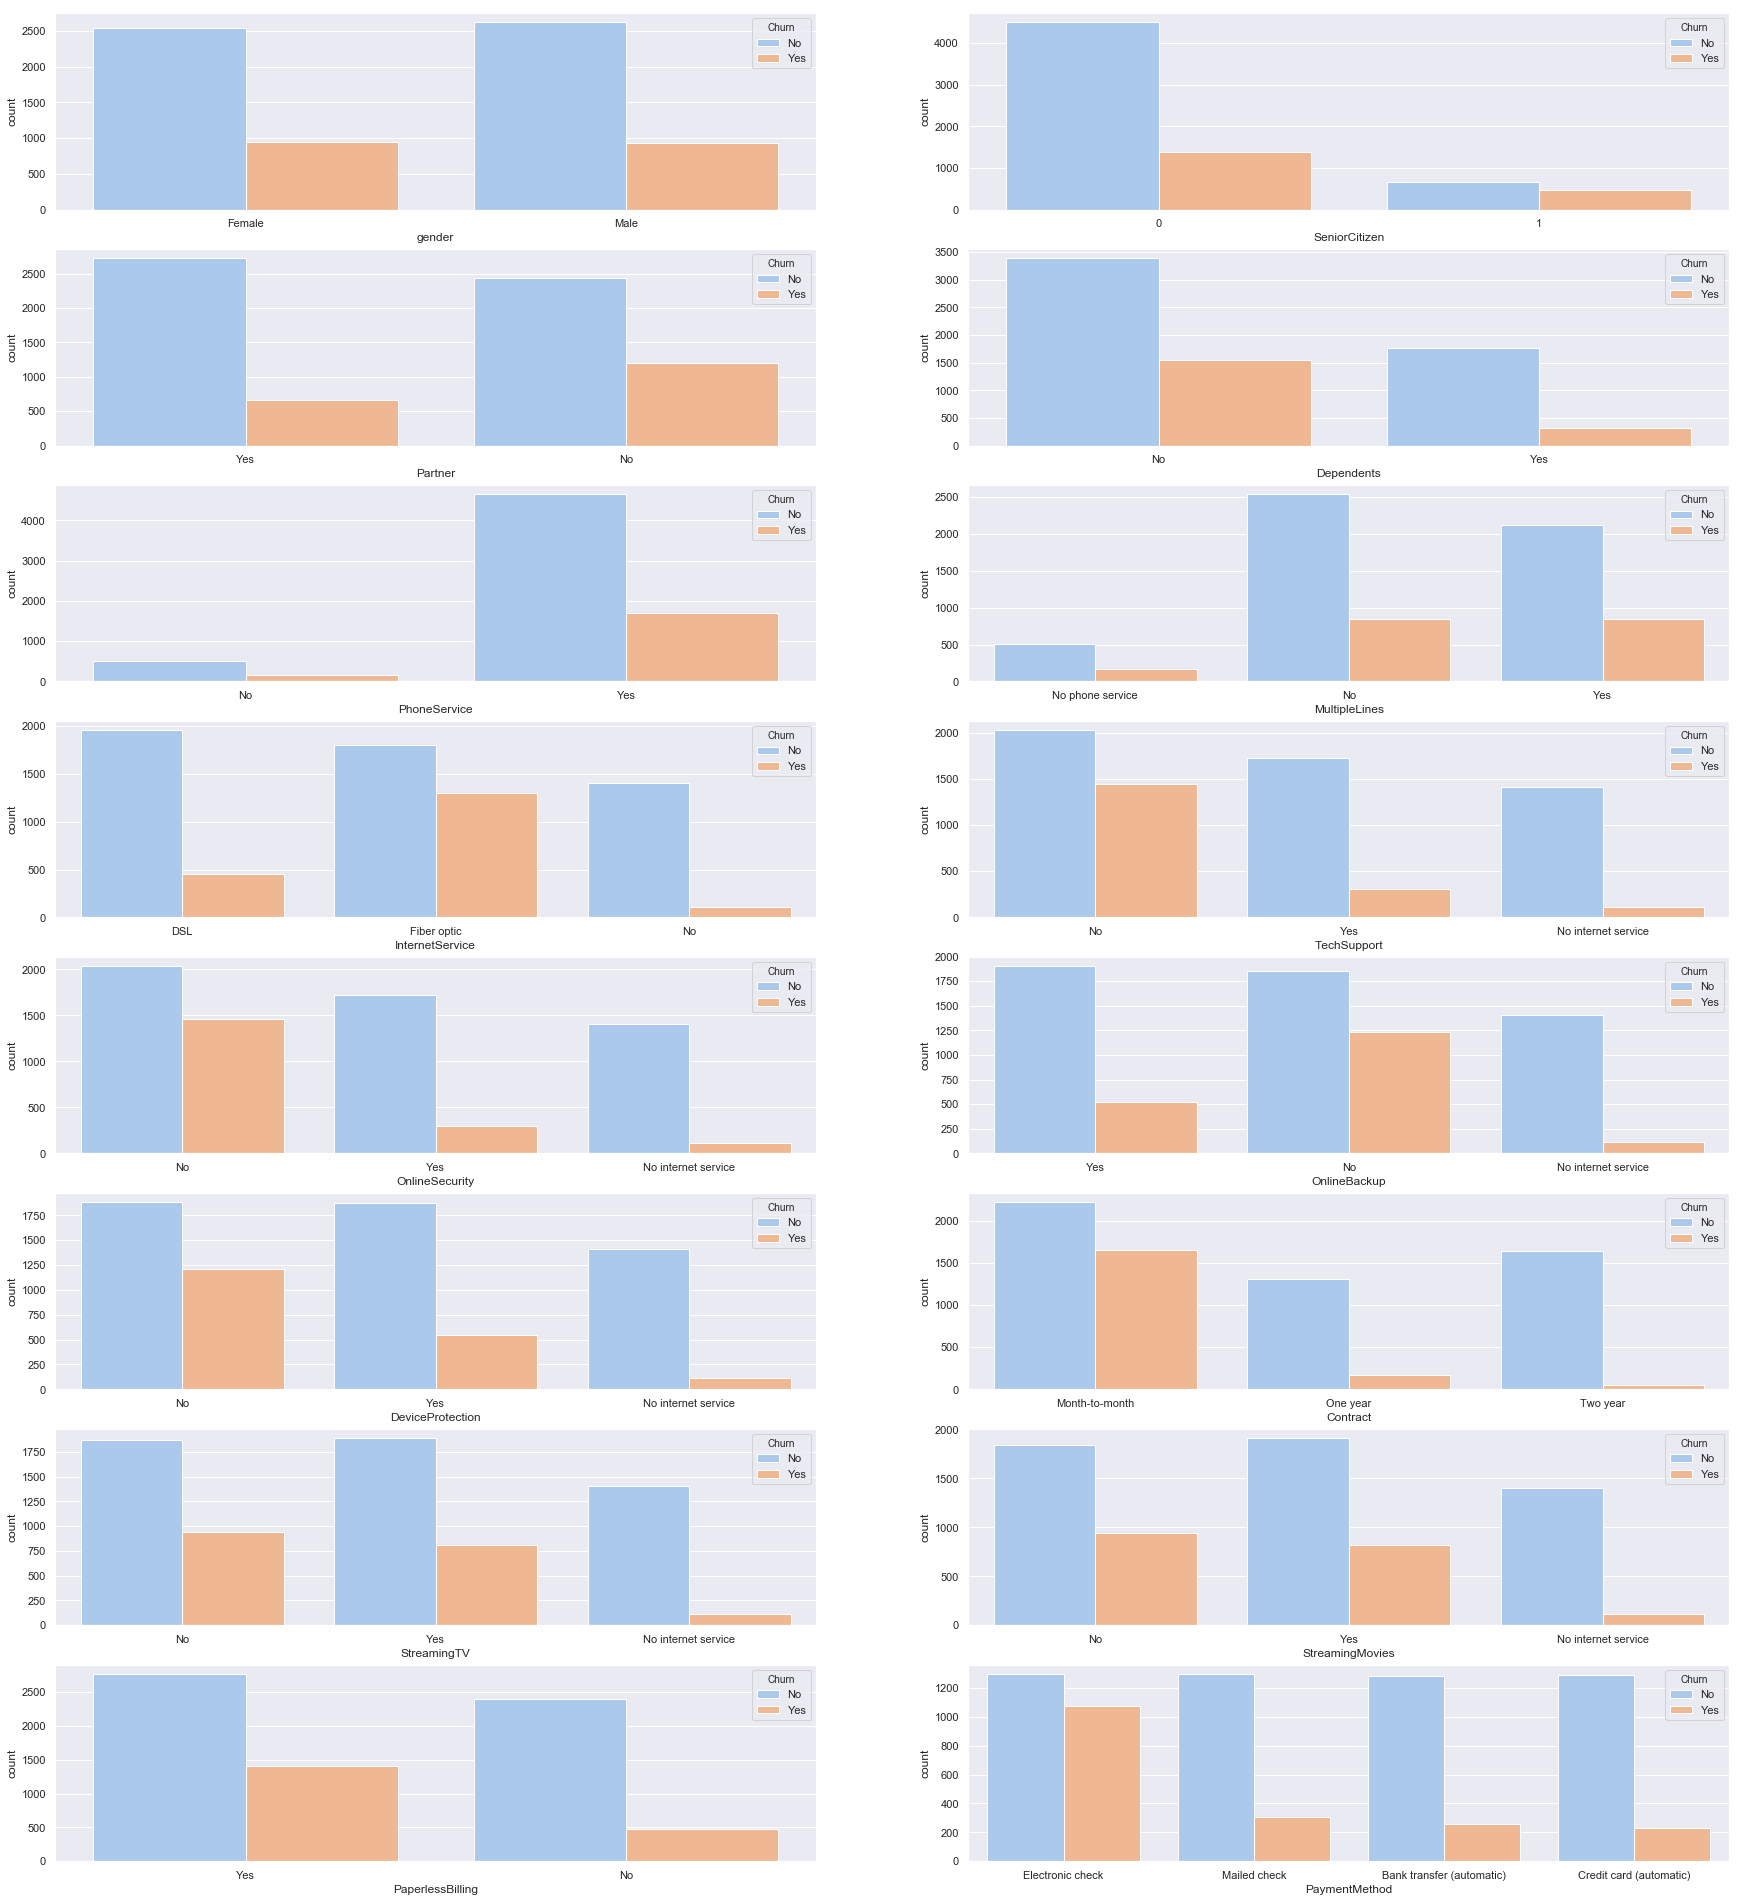

In [1068]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(30, 34))

plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService', 'TechSupport',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'Contract',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling','PaymentMethod']
index = 0
for i in range(8):
    for j in range(2):

        ax = sns.countplot(x=plot[index], hue='Churn', data=df, ax=axes[i,j]);
        index+=1

## We see that 

* **Seniors** are more likely to Churn.(45%)
* Customers who have no **Partners and Dependents** are more likely to Churn.(33% & 31%)
* Customers with **'Fiber Optic'** as their Internet Serive are more likely to Churn.(42%)
* Customers with absence of **Tech Support** higher is the Churn rate.(42%) 
* Customers with absence of **Online Security** higher is the Churn rate.(42%)
* Customers with absence of **Online Backup** higher is the Churn rate.(40%) 
* **'Month_to_Month'** contracts are more likely to churn.(43%)
* **PaperlessBilling** Customers who opted for paperless billing have churned.(34%)
* Customers who pay by **Electronic check** have a high tendency to check.(45%)

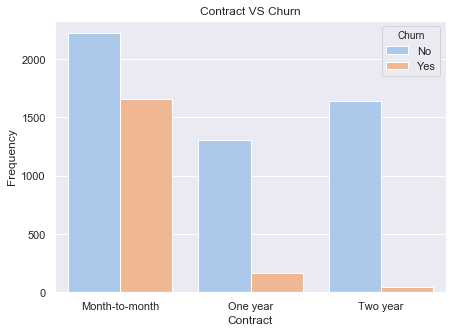

In [1046]:
sns.countplot(x=df['Contract'], data=df, hue='Churn')
plt.title('Contract VS Churn')
plt.xlabel("Contract")
plt.ylabel("Frequency")
plt.show()



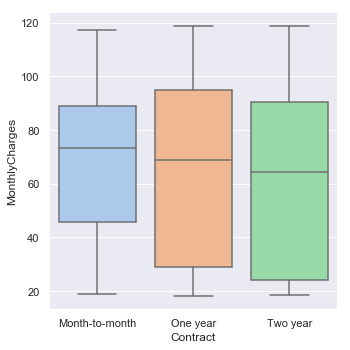

In [1047]:
sns.catplot(x="Contract",y='MonthlyCharges',
            kind="box", data=df.loc[(df['Contract']=='Month-to-month') | (df['Contract']=='One year')| (df['Contract']=='Two year')][['Contract','MonthlyCharges']])

# sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);


## 42% of Customers with Month-to-month contract opted to Churn where as only 11% of customers with One Year Contract opted to Churn and 2% of customers with Two Year Contract opted to Churn

## We can also see that mean of the month-to-month contracts has higher charges compared to the One year and Two Year. If this is the case, reducing the monthly charge for the month-to-month contract option would reduce customer churn rates.

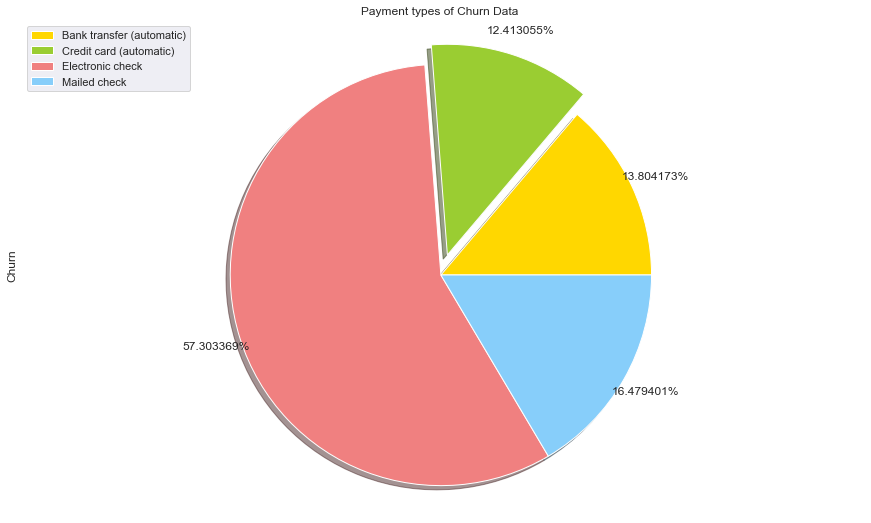

In [257]:
df_temp=df.loc[df['Churn']=='Yes'].groupby('PaymentMethod')[['Churn']].count()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode_list = [0, 0.1, 0, 0] 

plt.title('Different Payment types of Churn Data', y=1) 


df_temp['Churn'].plot(kind='pie',
                     figsize=(10, 12),
                            autopct='%f%%', 
                            startangle=0,     
                            shadow=True,  
                            subplots=True,
                                labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list, 
                            explode=explode_list )

plt.legend(labels=df_temp.index, loc='upper left') 
plt.axis('equal') 
plt.show()

## Major Customers who moved out are having 57% as electronic check as their as payment method, where as for Credit Card is 12%, bank transfer is 14% and Mailied Check is 16%. 

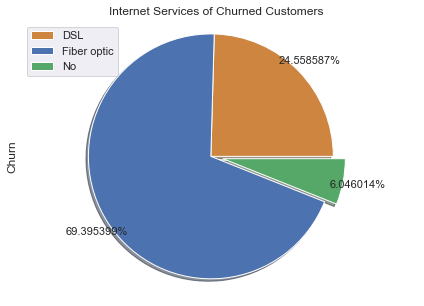

In [1051]:
df_temp=df.loc[df['Churn']=='Yes'].groupby('InternetService')[['Churn']].count()

colors_list = ['peru', 'b', 'g']
explode_list = [0, 0, 0.1] # ratio for each continent with which to offset each wedge.

plt.title('Internet Services of Churned Customers', y=1) 

df_temp['Churn'].plot(kind='pie',
#                      figsize=(10, 12),
                            autopct='%f%%', # add in percentages
                            startangle=0,     # start angle 90° (Africa)
                            shadow=True,  
                            subplots=True,# add shadow
                                     labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list )

plt.legend(labels=df_temp.index, loc='upper left') 
plt.axis('equal')
plt.show()

## Majority of the Customers who moved out are having 70% as Fiber Optic as their as Internet Service, where as for DSL is 25% and No is 6%.

In [1007]:
# df_temp= df.loc[(df['PhoneService']=='Yes') &\
#        (df['InternetService']=='Fiber optic') &\
#        (df['PaymentMethod']=='Electronic check') &\
#         (df['Contract']=='Month-to-month') &\
#         (df['TechSupport']=='No') &\
#         (df['PaperlessBilling']=='Yes')]
df_temp= df.loc[
       (df['InternetService']=='Fiber optic')]

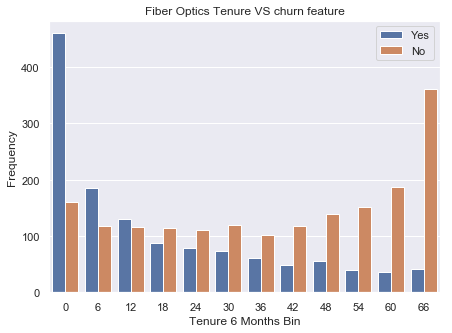

In [1012]:
sns.countplot(x="tenure_bin", data=df_temp, hue='Churn')
plt.title('Fiber Optics Tenure VS churn feature')
plt.legend()
plt.xlabel("Tenure 6 Months Bin")
plt.ylabel("Frequency")
plt.show()

## 75% of the Customers Churned in their first 6 months when their Internet Source is Fiber Optic.

## We can clearly say that there is major issue with the Fiber Optic.

In [1003]:
df_temp

,Churn
InternetService,
DSL,459
Fiber optic,1297
No,113


In [1019]:
df.loc[(df['InternetService']=='No') &\
       (df['Contract']=='Two year')].groupby('Churn')[['Churn']].count()

,Churn
Churn,
No,628
Yes,5


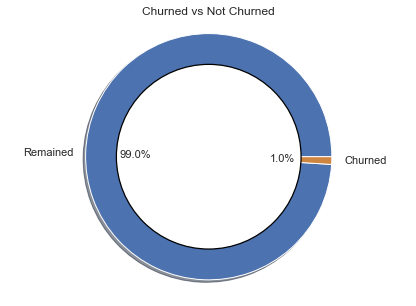

In [1038]:
import matplotlib.pyplot as plt
sns.set_palette("pastel")
# The slices will be ordered and plotted counter-clockwise.
labels = 'Remained', 'Churned'
sizes = [99, 1]
colors = ['b', 'peru']
explode = (0, 0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Churned vs Not Churned')
plt.show()  

## Correlation for Quantitative Features 

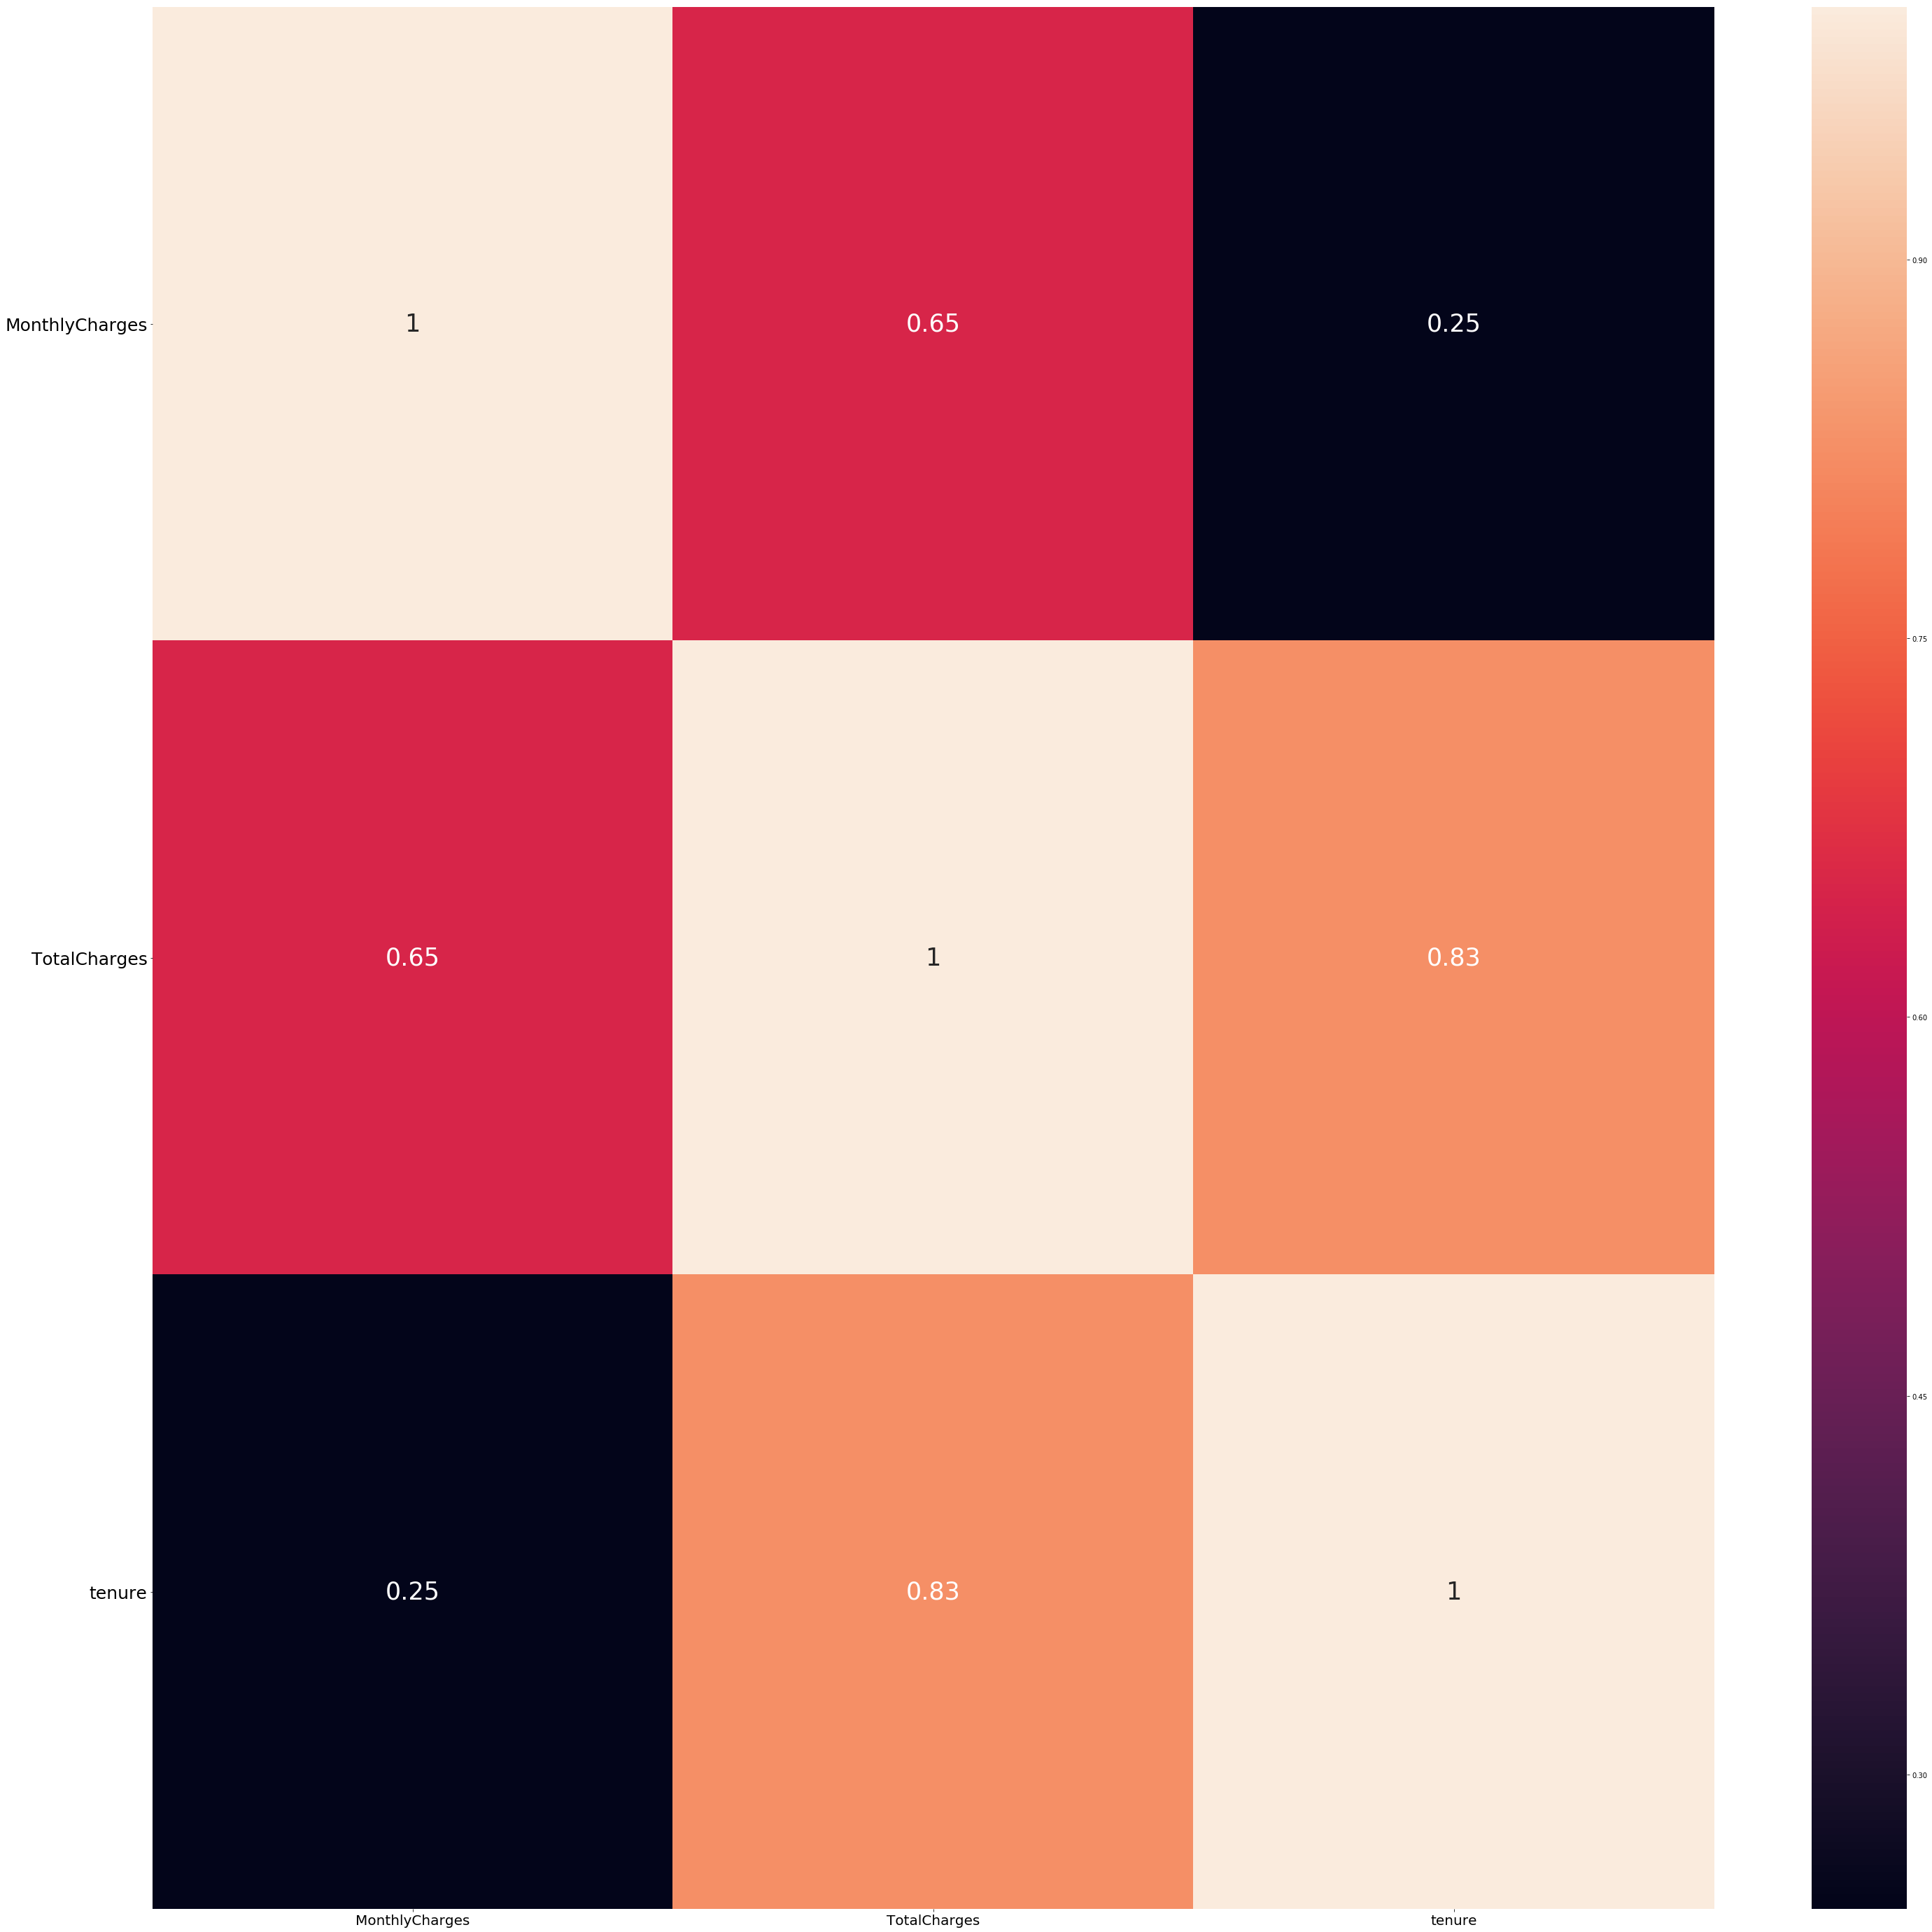

In [26]:
corr = df[['MonthlyCharges','TotalCharges','tenure']].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':35})
heat_map=plt.gcf()
heat_map.set_size_inches(50,50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.show()

In [27]:
df.drop(columns={'TotalCharges'},inplace=True)

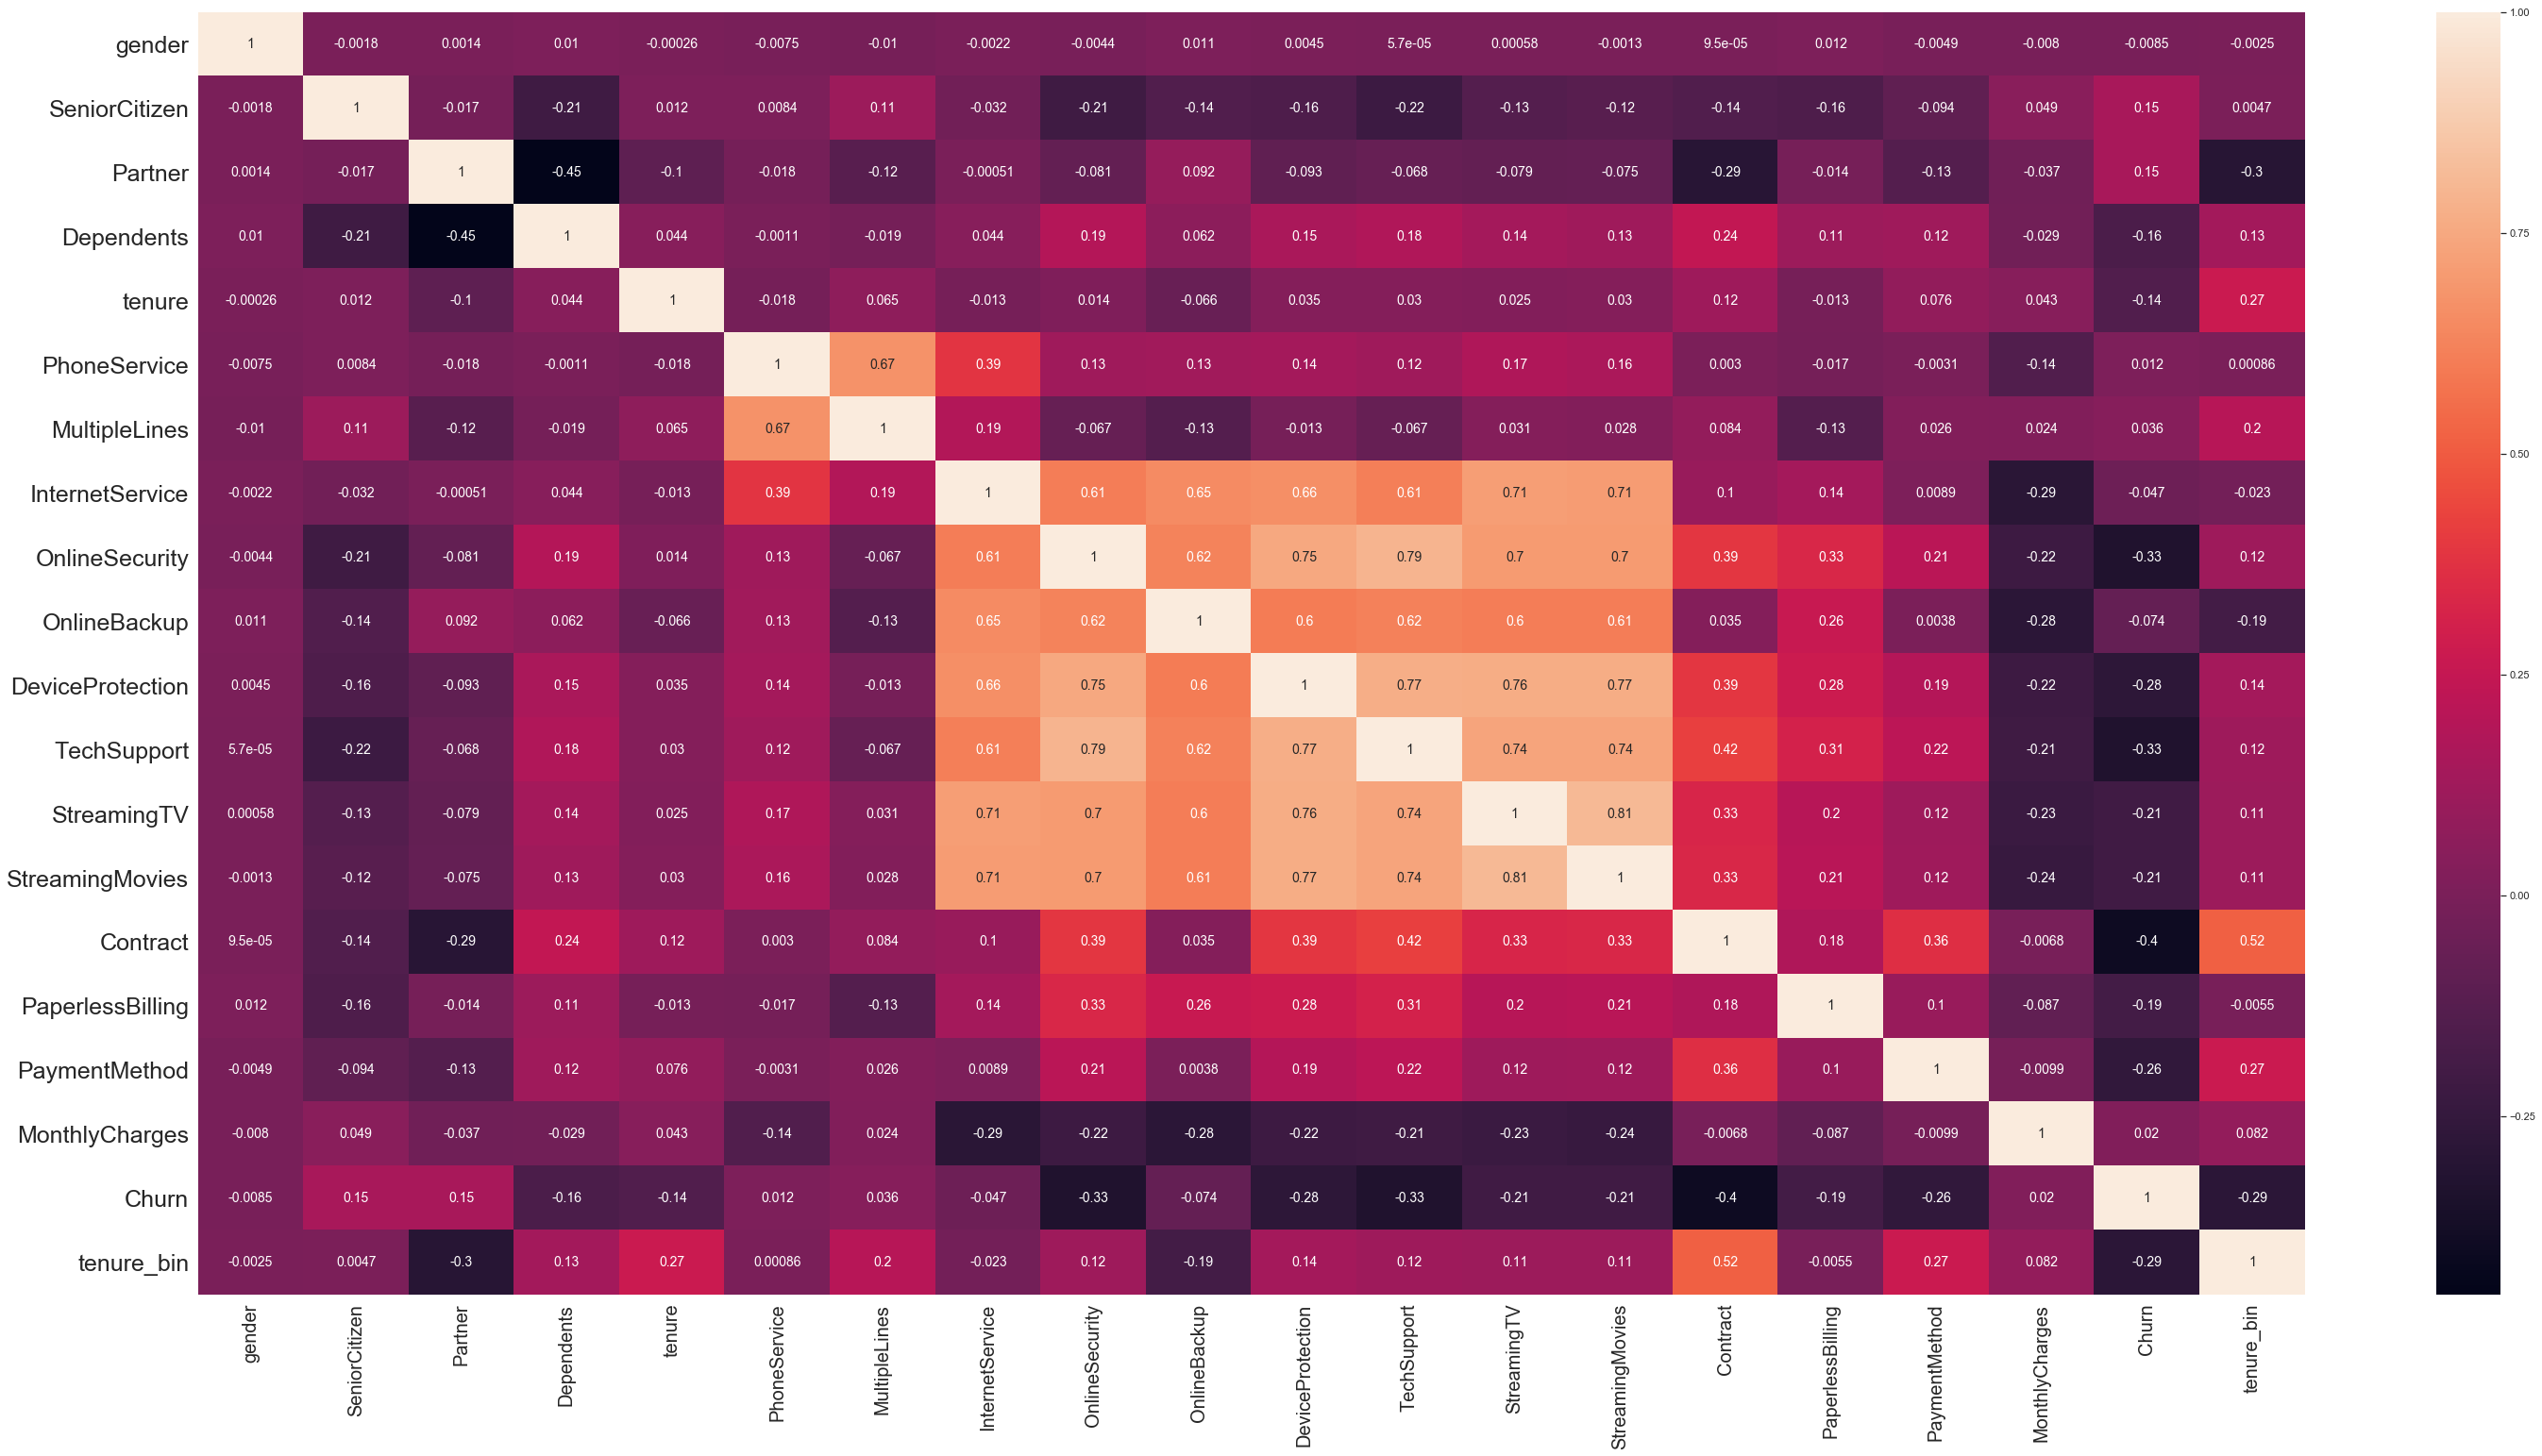

In [626]:
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':14})
heat_map=plt.gcf()
heat_map.set_size_inches(50,25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.show()

In [28]:
telcom_df =  df.iloc[:,:19]

In [29]:
telcom_df['Churn']=telcom_df.Churn.apply(lambda x: 1 if x=='Yes' else 0)
telcom_df['gender']=telcom_df.gender.apply(lambda x: 1 if x=='Male' else 0)
telcom_df['Partner']=telcom_df.Partner.apply(lambda x: 1 if x=='Yes' else 0)
telcom_df['Dependents']=telcom_df.Dependents.apply(lambda x: 1 if x=='Yes' else 0)
telcom_df['PhoneService']=telcom_df.PhoneService.apply(lambda x: 1 if x=='Yes' else 0)
telcom_df['PaperlessBilling']=telcom_df.PaperlessBilling.apply(lambda x: 1 if x=='Yes' else 0)

In [30]:
telcom_df =pd.get_dummies(data = telcom_df,columns = [
'MultipleLines',       
'InternetService',     
'OnlineSecurity',     
'OnlineBackup',        
'DeviceProtection',    
'TechSupport',         
'StreamingTV',         
'StreamingMovies',     
'Contract',            
'PaymentMethod'],dtype=np.int32 )

In [31]:
telcom_df['churn']= telcom_df['Churn']
telcom_df.drop(columns={'Churn'},inplace=True)

In [32]:
telcom_df.drop(columns={'MultipleLines_No phone service','OnlineSecurity_No internet service'\
                   ,'OnlineBackup_No internet service','DeviceProtection_No internet service'\
                   ,'TechSupport_No internet service','StreamingTV_No internet service'\
                  ,'StreamingMovies_No internet service'},inplace=True)

In [33]:
len(telcom_df.columns)

33

In [34]:
for x in telcom_df.columns:
    if(x!='customerID' and x!='MonthlyCharges' and x!='tenure'):
        print(x,sorted(telcom_df[x].unique()))

gender [0, 1]
SeniorCitizen [0, 1]
Partner [0, 1]
Dependents [0, 1]
PhoneService [0, 1]
PaperlessBilling [0, 1]
MultipleLines_No [0, 1]
MultipleLines_Yes [0, 1]
InternetService_DSL [0, 1]
InternetService_Fiber optic [0, 1]
InternetService_No [0, 1]
OnlineSecurity_No [0, 1]
OnlineSecurity_Yes [0, 1]
OnlineBackup_No [0, 1]
OnlineBackup_Yes [0, 1]
DeviceProtection_No [0, 1]
DeviceProtection_Yes [0, 1]
TechSupport_No [0, 1]
TechSupport_Yes [0, 1]
StreamingTV_No [0, 1]
StreamingTV_Yes [0, 1]
StreamingMovies_No [0, 1]
StreamingMovies_Yes [0, 1]
Contract_Month-to-month [0, 1]
Contract_One year [0, 1]
Contract_Two year [0, 1]
PaymentMethod_Bank transfer (automatic) [0, 1]
PaymentMethod_Credit card (automatic) [0, 1]
PaymentMethod_Electronic check [0, 1]
PaymentMethod_Mailed check [0, 1]
churn [0, 1]


 ## Normalizing the Data

In [35]:
telcom_df = (telcom_df-np.min(telcom_df))/(np.max(telcom_df)-np.min(telcom_df)).values

In [37]:
telcom_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn
0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.098592,1.0,1.0,0.809950,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.295775,1.0,1.0,0.704975,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.126761,0.0,0.0,0.114428,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0,0.380282,1.0,1.0,0.861194,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,1.0,0.0,0.0,1.0,0.859155,1.0,0.0,0.377114,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Feature Selection - Feature Importance

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


tenure                                     0.212651
MonthlyCharges                             0.203357
Contract_Month-to-month                    0.075321
InternetService_Fiber optic                0.042950
PaperlessBilling                           0.033935
Partner                                    0.033422
Dependents                                 0.028359
PaymentMethod_Electronic check             0.027161
SeniorCitizen                              0.026408
DeviceProtection_No                        0.026137
TechSupport_No                             0.023039
OnlineBackup_No                            0.020818
Contract_Two year                          0.018198
OnlineSecurity_No                          0.016787
MultipleLines_Yes                          0.016695
MultipleLines_No                           0.016191
OnlineSecurity_Yes                         0.016017
PaymentMethod_Credit card (automatic)      0.015159
StreamingTV_Yes                            0.014143
StreamingTV_

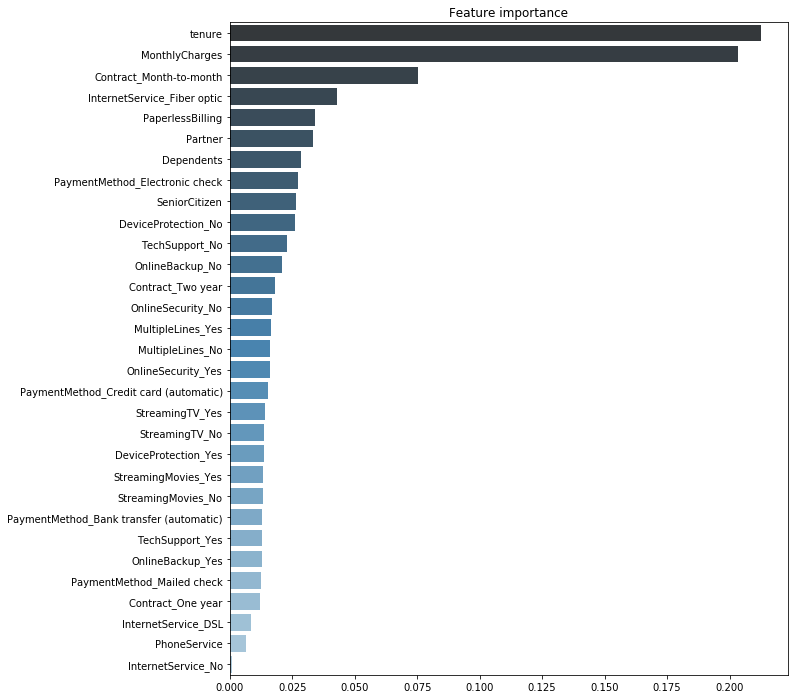

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

x, y = telcom_df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']], telcom_df.iloc[:,32]

# feature extraction
model = ExtraTreesClassifier()
model.fit(x, y)
# print(model.feature_importances_)
imp = pd.Series(data=model.feature_importances_, index=x.columns).sort_values(ascending=False)
print(imp)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

## Feature Selection - Select KBest Method

In [39]:
select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(telcom_df.iloc[:,:32], telcom_df.iloc[:,32])
indexes = selected_features.get_support(indices=True)
print(indexes)
col_names_selected = [telcom_df.columns[i] for i in indexes]

X_selected = telcom_df[col_names_selected]
X_selected.head(10)


[ 1  2  3  4  6  7 11 12 13 14 15 17 19 20 23 25 26 27 29 30]


,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_No,TechSupport_No,TechSupport_Yes,StreamingMovies_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0.0,1.0,0.0,0.000000,1.0,0.115423,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.464789,0.0,0.385075,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.014085,1.0,0.354229,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.619718,0.0,0.239303,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.014085,1.0,0.521891,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.098592,1.0,0.809950,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.295775,1.0,0.704975,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.126761,0.0,0.114428,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.380282,1.0,0.861194,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.859155,0.0,0.377114,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Feature Selection - RFE Method

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


model_rfe=LogisticRegression()
rfe=RFE(model_rfe,1)
rfe_fit=rfe.fit(telcom_df.iloc[:,:32],telcom_df.iloc[:,32])
rfe_fit.n_features_

rfe_fit.ranking_

rank=list(rfe_fit.ranking_)
# X.columns

col_nm=list(telcom_df.iloc[:,:32].columns)
dict_rank={'Column_Name': col_nm,'Ranking':rank}
df_rank=pd.DataFrame(dict_rank)
df_rank.sort_values('Ranking')

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-package

,Column_Name,Ranking
4,tenure,1
11,InternetService_Fiber optic,2
12,InternetService_No,3
25,Contract_Month-to-month,4
27,Contract_Two year,5
13,OnlineSecurity_No,6
8,MultipleLines_No,7
29,PaymentMethod_Credit card (automatic),8
31,PaymentMethod_Mailed check,9
28,PaymentMethod_Bank transfer (automatic),10


## Splitting the Data

In [450]:
from sklearn.model_selection import train_test_split

# new_data=df1.iloc[:,0:44][(df9.loc[(df9[2]==True)][0])]
# x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values

# X_train, X_test, y_train, y_test = train_test_split(telcom_df[['MonthlyCharges',
# 'tenure',
# 'Contract_Month-to-month',
# 'OnlineSecurity_No',
# 'InternetService_Fiber optic',
# 'Partner',
# 'PaperlessBilling',
# 'Dependents',
# 'PaymentMethod_Electronic check',
# 'SeniorCitizen',
# 'TechSupport_No',
# 'Contract_Two year',
# 'OnlineBackup_No',
# 'MultipleLines_No',
# 'DeviceProtection_No',
# 'PaymentMethod_Credit card (automatic)',
# 'StreamingTV_No']],
#                                                     telcom_df.iloc[:,32], test_size=0.30,random_state=42)

# DeviceProtection_No                        0.015770
# MultipleLines_Yes                          0.015703
# OnlineBackup_Yes                           0.015197
# PaymentMethod_Credit card (automatic)      0.014911
# StreamingMovies_No                         0.014368
# PaymentMethod_Bank transfer (automatic)    0.014342
# StreamingTV_No                             0.014225
# StreamingMovies_Yes 


X_train, X_test, y_train, y_test = train_test_split(telcom_df[df_rank.loc[df_rank['Ranking']<=25]['Column_Name']],
                                                    telcom_df.iloc[:,32], test_size=0.30,random_state=42)




In [740]:
y_test.value_counts()

0.0    1549
1.0     561
Name: churn, dtype: int64

In [738]:
max(y_test.mean(), 1 - y_test.mean())

0.7341232227488151

## Visulaizing the Train/Test Split Data

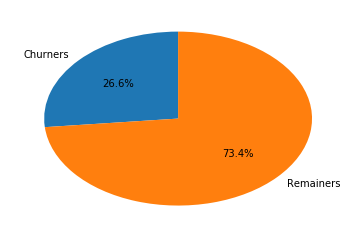

In [47]:
fig1, ax1 = plt.subplots()
ax1.pie([y_train[y_train==1].size, y_train[y_train==0].size], labels=['Churners', 'Remainers'],
        autopct='%1.1f%%', startangle=90)
plt.show()

## Logistic Regression

## Logistic Regression - Grid Search CV

In [48]:
# Create logistic regression instance
logistic = LogisticRegression()
# Regularization penalty space
penalty = ['l1', 'l2']
# Regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search using 10-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=10, scoring='accuracy' ,n_jobs=-1)
# Fit grid search
print(clf)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)


In [49]:
best_model = clf.fit(X_train, y_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


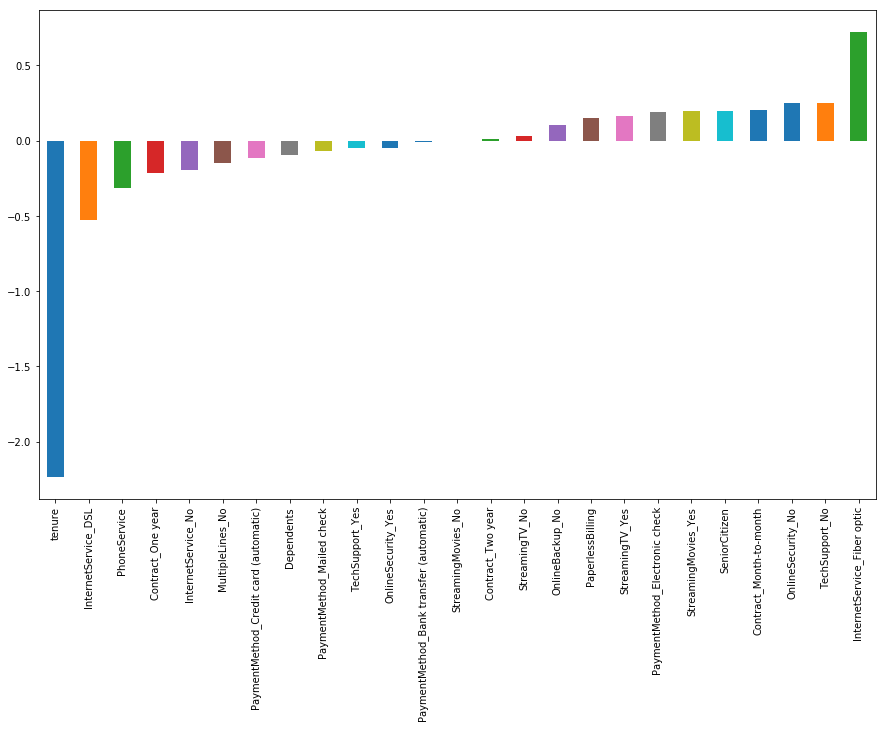

In [149]:
from pandas import Series
clf.coef_
predictors= X_train.columns
coef= Series(clf.coef_[0],X_train.columns).sort_values()
coef.plot(kind='bar',figsize=(15,9))
plt.show()

In [140]:
y_train_GCV = best_model.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(best_model.score(X_train, y_train)))

y_pred_GCV_LR = best_model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(best_model.score(X_test, y_test)))


Accuracy of logistic regression classifier on train set: 0.80
Accuracy of logistic regression classifier on test set: 0.80


In [120]:
best_model.predict(X_test)

array([0., 0., 1., ..., 0., 0., 0.])

In [122]:
y_pred_prob = best_model.predict_proba(X_test)[:,1]

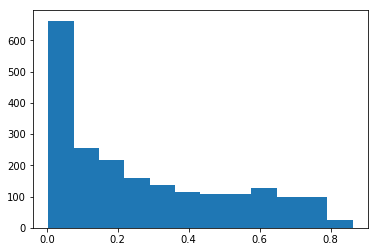

In [138]:
plt.hist(y_pred_prob,bins=12)
# plt.xlim(0,2)
plt.show()

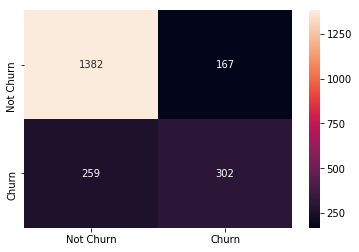

F1Score of LR:  79.0
Accuracy of LR:  80.0
Precision of LR:  79.0
Recall of LR:  80.0
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1549
         1.0       0.64      0.54      0.59       561

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [679]:
from sklearn.metrics import classification_report, confusion_matrix
lr_conf_lr = confusion_matrix(y_test, y_pred_GCV_LR)
sns.heatmap(lr_conf_lr, annot=True, xticklabels=["Not Churn","Churn"],
                yticklabels=["Not Churn","Churn"],fmt="d")
plt.show()
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
print('F1Score of LR: ',round(f1_score(y_test,y_pred_GCV_LR, average='weighted')*100)) 
print('Accuracy of LR: ',round(accuracy_score(y_test,y_pred_GCV_LR)*100))
print('Precision of LR: ',round(precision_score(y_test,y_pred_GCV_LR, average='weighted')*100))
print('Recall of LR: ',round(recall_score(y_test,y_pred_GCV_LR, average='weighted')*100))


print("Classification Report")
print(metrics.classification_report(y_test, y_pred_GCV_LR))

## Logistic Regression - ROC Curve

In [67]:
from sklearn.metrics import roc_auc_score
print('AUROC: ' + str(roc_auc_score(y_test, y_pred_GCV_LR)))

AUROC: 0.715656354683431


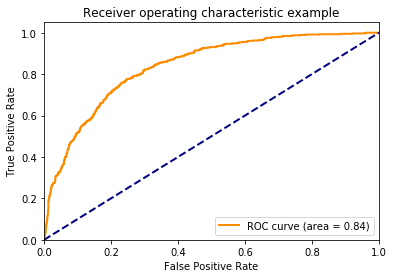

In [686]:
from sklearn.metrics import roc_auc_score,roc_curve,scorer,auc
fpr, tpr, thres = roc_curve(y_test, y_scores_lr)
# print(thres)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [684]:
y_scores_lr = best_model.predict_proba(X_test)[:, 1]


array([0.01365066, 0.14714564, 0.69532264, ..., 0.01193125, 0.29234265,
       0.17058424])

In [675]:
y_pred_GCV_LR[0:5]

array([0., 0., 1., 0., 0.])

In [664]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [666]:
thresholds.shape

(2043,)

In [667]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

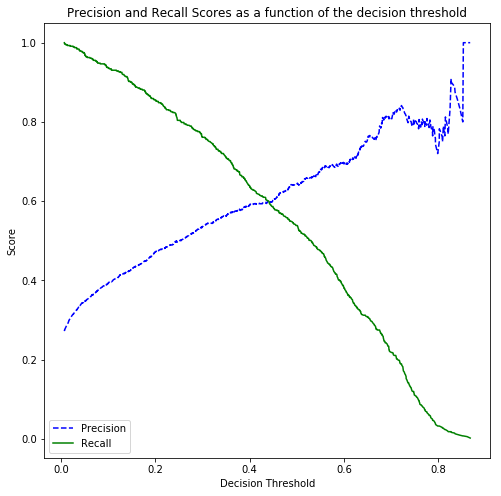

In [668]:
plot_precision_recall_vs_threshold(p, r, thresholds)

## SVM

##  SVM - Grid Search

In [74]:
from sklearn.model_selection import cross_val_score

svm = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
clf = GridSearchCV(svm, parameters, cv=5)
clf.fit(X_train,y_train)
print("Best Parameters:\n", clf.best_params_)
print("Best Estimators:\n", clf.best_estimator_)

Best Parameters:
 {'decision_function_shape': 'ovo', 'kernel': 'linear', 'gamma': 1, 'shrinking': True, 'C': 0.5}
Best Estimators:
 SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [689]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
clf = svm.SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
best_model_svm =clf.fit(X_train, y_train) 
yhat_train = clf.predict(X_train)
yhat = clf.predict(X_test)

In [698]:
clf.fit(X_train, y_train).decision_function(X_test)

array([-2.61625824, -1.36778655,  0.77324595, ..., -2.63186491,
       -0.87606419, -1.31697075])

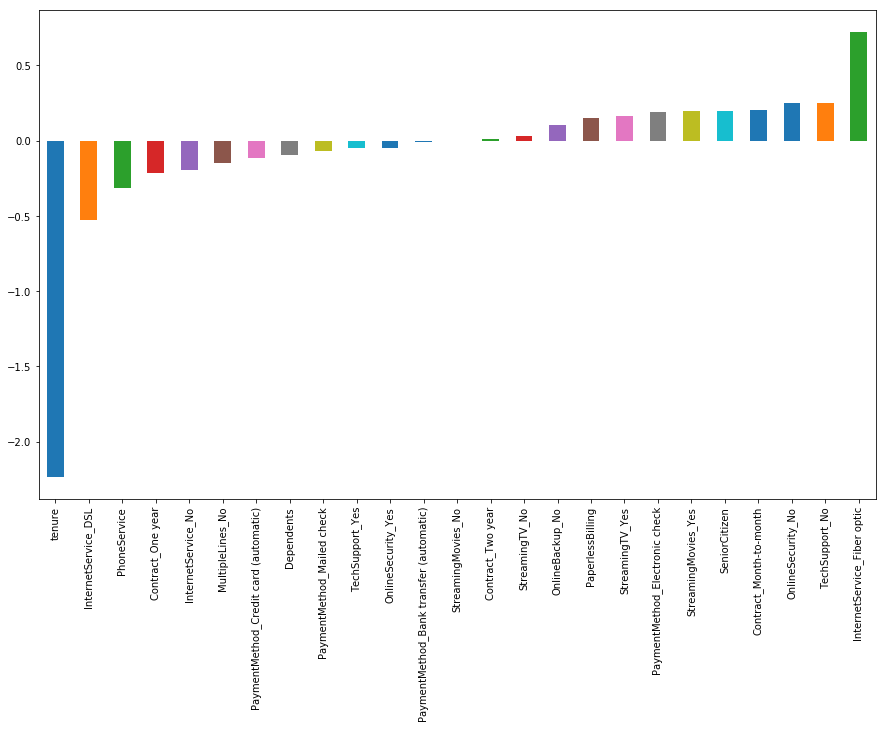

In [155]:
from pandas import Series
clf.coef_
predictors= X_train.columns
coef= Series(clf.coef_[0],X_train.columns).sort_values()
coef.plot(kind='bar',figsize=(15,9))
plt.show()

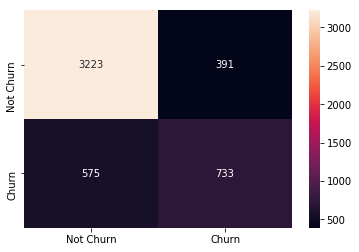

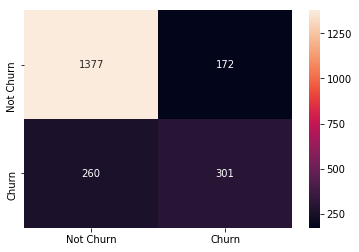

F1Score of SVM:  79.0
Accuracy of SVM:  80.0
Precision of SVM:  79.0
Recall of SVM:  80.0
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      3614
         1.0       0.65      0.56      0.60      1308

   micro avg       0.80      0.80      0.80      4922
   macro avg       0.75      0.73      0.74      4922
weighted avg       0.80      0.80      0.80      4922

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1549
         1.0       0.64      0.54      0.58       561

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Accuracy of SVM classifier on train set: 0.80
Accuracy of SVM classifier on test set: 0.80


In [388]:
cnf_matrix = confusion_matrix(y_train, yhat_train, labels=[0,1])
# print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, xticklabels=["Not Churn","Churn"],
                yticklabels=["Not Churn","Churn"], fmt="d")
plt.show()



cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
# print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, xticklabels=["Not Churn","Churn"],
                yticklabels=["Not Churn","Churn"], fmt="d")
plt.show()

from sklearn.metrics import accuracy_score,precision_score
print('F1Score of SVM: ',round(f1_score(y_test,yhat, average='weighted')*100)) 
print('Accuracy of SVM: ',round(accuracy_score(y_test,yhat)*100))
print('Precision of SVM: ',round(precision_score(y_test,yhat, average='weighted')*100))
print('Recall of SVM: ',round(recall_score(y_test,yhat, average='weighted')*100))



from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_train, yhat_train))

from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, yhat))


y_train_GCV = best_model.predict(X_train)
print('Accuracy of SVM classifier on train set: {:.2f}'.format(clf.score(X_train, y_train)))

y_pred_GCV_LR = best_model.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

## SVM - ROC Curve

In [86]:
from sklearn.metrics import roc_auc_score
print('AUROC: ' + str(roc_auc_score(y_test, yhat)))

y_scores_svm = best_model.predict_proba(X_test)[:, 1]

AUROC: 0.7142880980081451


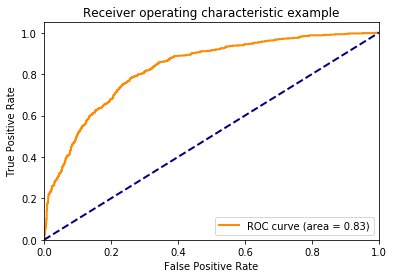

In [701]:
from sklearn.metrics import roc_auc_score,roc_curve,scorer,auc
y_scores_svm=clf.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thres = roc_curve(y_test, y_scores_svm)
# print(thres)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [906]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start = 25, stop = 100, num = 15)]
# number of features at every split
max_features = ['auto', 'sqrt']

criterion = ['entropy','gini']

# max depth
max_depth = [int(x) for x in np.linspace(5, 100, num = 30)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth,
 'criterion':criterion   
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.7s
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-pack

{'n_estimators': 918, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy'}


In [706]:
from sklearn.ensemble import RandomForestClassifier as RandomForest
rf = RandomForest(n_estimators = 30,
                             max_depth = 8,
                  max_features=13,
                             criterion = "entropy")
rf.fit(X_train, y_train)
y_pred_nrf_train = rf.predict(X_train)
y_pred_nrf = rf.predict(X_test)
acc_rf_train =  metrics.accuracy_score(y_train,y_pred_nrf_train) * 100
acc_rf =  metrics.accuracy_score(y_test,y_pred_nrf) * 100
print("{:.2f}".format(acc_rf_train))
print("{:.2f}".format(acc_rf))
print(y_pred_nrf[0:5])

84.32
79.43
[0. 0. 1. 0. 0.]


array([0.0016908 , 0.10390367, 0.68452529, ..., 0.01040323, 0.333433  ,
       0.25930106])

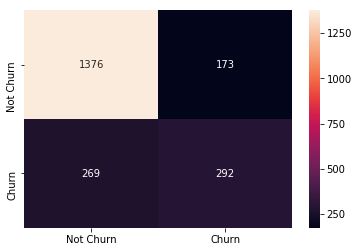

F1Score of RF:  78.0
Accuracy of RF:  79.0
Precision of RF:  78.0
Recall of RF:  79.0
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1549
         1.0       0.63      0.52      0.57       561

   micro avg       0.79      0.79      0.79      2110
   macro avg       0.73      0.70      0.72      2110
weighted avg       0.78      0.79      0.78      2110



In [419]:
cnf_matrix = confusion_matrix(y_test, y_pred_nrf, labels=[0,1])
# print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, xticklabels=["Not Churn","Churn"],
                yticklabels=["Not Churn","Churn"], fmt="d")
plt.show()

from sklearn.metrics import accuracy_score,precision_score
print('F1Score of RF: ',round(f1_score(y_test,y_pred_nrf, average='weighted')*100)) 
print('Accuracy of RF: ',round(accuracy_score(y_test,y_pred_nrf)*100))
print('Precision of RF: ',round(precision_score(y_test,y_pred_nrf, average='weighted')*100))
print('Recall of RF: ',round(recall_score(y_test,y_pred_nrf, average='weighted')*100))


print (classification_report(y_test, y_pred_nrf))

In [728]:
y_scores_rf=rf.fit(X_train, y_train).predict_proba(X_test)[:,1]

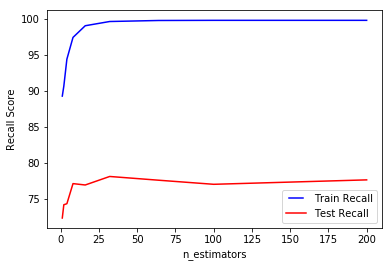

In [396]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)

   
   train_results.append(recall_score(y_train, train_pred, average='weighted')*100)
   y_pred = rf.predict(X_test)

   test_results.append(recall_score(y_test, y_pred, average='weighted')*100)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train Recall")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test Recall")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall Score')
plt.xlabel('n_estimators')
plt.show()

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python

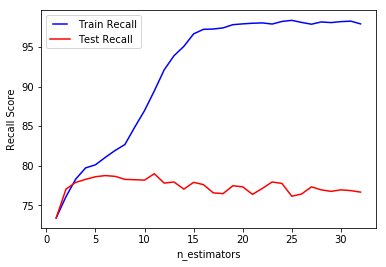

In [400]:
max_depths  = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)

   
   train_results.append(recall_score(y_train, train_pred, average='weighted')*100)
   y_pred = rf.predict(X_test)

   test_results.append(recall_score(y_test, y_pred, average='weighted')*100)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train Recall")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Recall")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall Score')
plt.xlabel('n_estimators')
plt.show()

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python

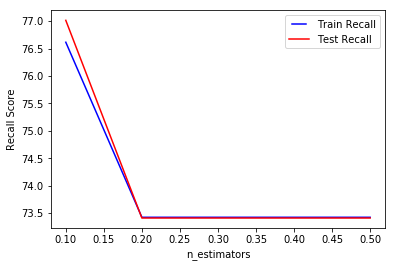

In [403]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)

   
   train_results.append(recall_score(y_train, train_pred, average='weighted')*100)
   y_pred = rf.predict(X_test)

   test_results.append(recall_score(y_test, y_pred, average='weighted')*100)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train Recall")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test Recall")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall Score')
plt.xlabel('n_estimators')
plt.show()

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python

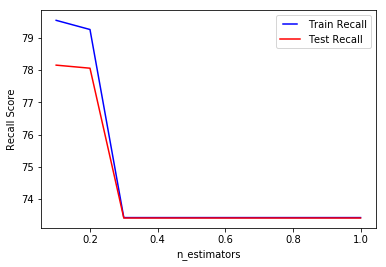

In [407]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)

   
   train_results.append(recall_score(y_train, train_pred, average='weighted')*100)
   y_pred = rf.predict(X_test)

   test_results.append(recall_score(y_test, y_pred, average='weighted')*100)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train Recall")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test Recall")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall Score')
plt.xlabel('n_estimators')
plt.show()

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python

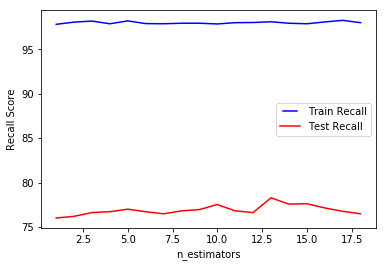

In [416]:
max_features = list(range(1,df.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)

   
   train_results.append(recall_score(y_train, train_pred, average='weighted')*100)
   y_pred = rf.predict(X_test)

   test_results.append(recall_score(y_test, y_pred, average='weighted')*100)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train Recall")
line2, = plt.plot(max_features, test_results, 'r', label="Test Recall")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall Score')
plt.xlabel('n_estimators')
plt.show()

## Random Forest - Roc Curve

Text(0.5,0,'False Positive Rate')

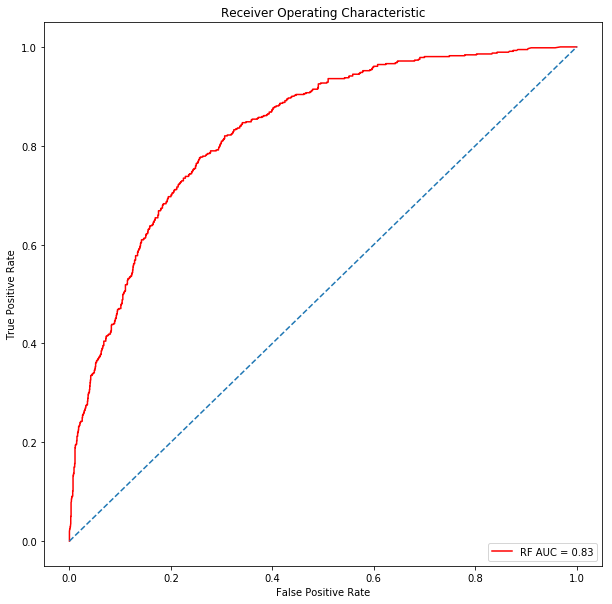

In [717]:
from sklearn.metrics import roc_curve, auc
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_pred_nrf)
# fpr_2, tpr_2, thresholds = roc_curve(y_re_test, y_pred_rf)
roc_auc_1 = auc(fpr_1, tpr_1)
# roc_auc_2 = auc(fpr_2, tpr_2)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_1,tpr_1, color='red',label = 'RF AUC = %0.2f' % roc_auc_1)
# plt.plot(fpr_2,tpr_2, color='green',label = 'Upsampled AUC = %0.2f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Gradient Boosting

In [720]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


num_estimators = [25,30,35,40,45]
learn_rates = [ 0.1]
# max_depths = [int(x) for x in np.linspace(5, 100, num = 30)]
max_depths = [4, 6, 8]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths}

grid_search = GridSearchCV(GradientBoostingClassifier(min_samples_split=2),
                           param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1], 'max_depth': [4, 6, 8], 'n_estimators': [25, 30, 35, 40, 45]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [721]:
y_pred_gbr_train = grid_search.predict(X_train)
y_pred_gbr = grid_search.predict(X_test)
y_scores_gbr=grid_search.fit(X_train, y_train).predict_proba(X_test)[:,1]

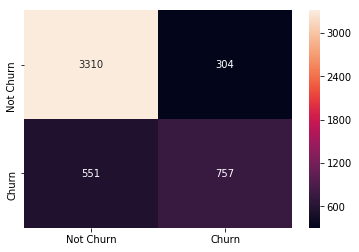

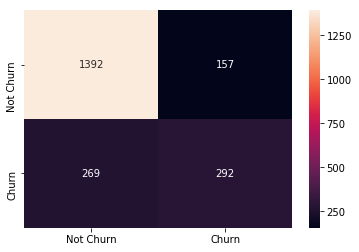

82.62901259650548
79.81042654028437
F1Score of GBT:  79.0
Accuracy of GBT:  80.0
Precision of GBT:  79.0
Recall of GBT:  80.0
AUROC: 0.7095716976854713


In [722]:
cnf_matrix = confusion_matrix(y_train, y_pred_gbr_train, labels=[0,1])
# print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, xticklabels=["Not Churn","Churn"],
                yticklabels=["Not Churn","Churn"], fmt="d")
plt.show()

cnf_matrix = confusion_matrix(y_test, y_pred_gbr, labels=[0,1])
# print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, xticklabels=["Not Churn","Churn"],
                yticklabels=["Not Churn","Churn"], fmt="d")
plt.show()

print(metrics.accuracy_score(y_train,y_pred_gbr_train) * 100)
print(metrics.accuracy_score(y_test,y_pred_gbr) * 100)

from sklearn.metrics import accuracy_score,precision_score,recall_score
print('F1Score of GBT: ',round(f1_score(y_test,y_pred_gbr, average='weighted')*100)) 
print('Accuracy of GBT: ',round(accuracy_score(y_test,y_pred_gbr)*100))
print('Precision of GBT: ',round(precision_score(y_test,y_pred_gbr, average='weighted')*100))
print('Recall of GBT: ',round(recall_score(y_test,y_pred_gbr, average='weighted')*100))



from sklearn.metrics import roc_auc_score
print('AUROC: ' + str(roc_auc_score(y_test, y_pred_gbr)))

In [184]:
print (classification_report(y_test, y_pred_gbr))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1549
         1.0       0.64      0.53      0.58       561

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



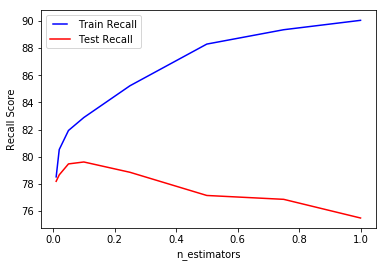

In [430]:
learn_rates = [0.01, 0.02, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
train_results = []
test_results = []
for learning_rate in learn_rates:
   rf = GradientBoostingClassifier(learning_rate=learning_rate)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)

   
   train_results.append(recall_score(y_train, train_pred, average='weighted')*100)
   y_pred = rf.predict(X_test)

   test_results.append(recall_score(y_test, y_pred, average='weighted')*100)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learn_rates, train_results, 'b', label="Train Recall")
line2, = plt.plot(learn_rates, test_results, 'r', label="Test Recall")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall Score')
plt.xlabel('n_estimators')
plt.show()

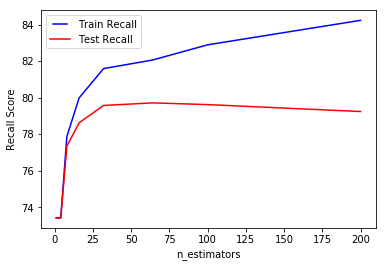

In [427]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = GradientBoostingClassifier(n_estimators=estimator)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)

   
   train_results.append(recall_score(y_train, train_pred, average='weighted')*100)
   y_pred = rf.predict(X_test)

   test_results.append(recall_score(y_test, y_pred, average='weighted')*100)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train Recall")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test Recall")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall Score')
plt.xlabel('n_estimators')
plt.show()

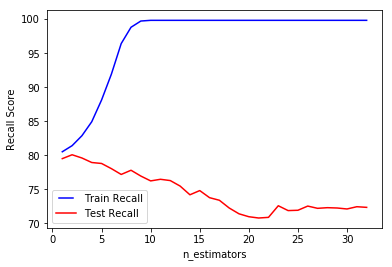

In [432]:
max_depths  = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = GradientBoostingClassifier(max_depth=max_depth)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)

   
   train_results.append(recall_score(y_train, train_pred, average='weighted')*100)
   y_pred = rf.predict(X_test)

   test_results.append(recall_score(y_test, y_pred, average='weighted')*100)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train Recall")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Recall")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall Score')
plt.xlabel('n_estimators')
plt.show()

## Data UpSampling 

In [451]:
from sklearn.utils import resample

df_majority = telcom_df[telcom_df.churn==0]
df_minority = telcom_df[telcom_df.churn==1]

df_minority_upsampled = resample(df_minority,
                                replace=True,
                                n_samples=5000,
                                random_state=123)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print('Churn Count in Original Data: \n', telcom_df.churn.value_counts(), '\n')
print('New Churn Count: \n', df_upsampled.churn.value_counts())

Churn Count in Original Data: 
 0.0    5163
1.0    1869
Name: churn, dtype: int64 

New Churn Count: 
 0.0    5163
1.0    5000
Name: churn, dtype: int64


In [660]:
from sklearn.feature_selection import RFE
model_rfe=LogisticRegression()
rfe=RFE(model_rfe,1)
rfe_fit=rfe.fit(df_upsampled.iloc[:,:32],df_upsampled.iloc[:,32])
rfe_fit.n_features_

rfe_fit.ranking_

rank=list(rfe_fit.ranking_)

col_nm=list(df_upsampled.iloc[:,:32].columns)
dict_rank={'Column_Name': col_nm,'Ranking':rank}
df_re_rank=pd.DataFrame(dict_rank)
df_re_rank.sort_values('Ranking')

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-package

,Column_Name,Ranking
4,tenure,1
11,InternetService_Fiber optic,2
12,InternetService_No,3
25,Contract_Month-to-month,4
27,Contract_Two year,5
7,MonthlyCharges,6
22,StreamingTV_Yes,7
13,OnlineSecurity_No,8
30,PaymentMethod_Electronic check,9
24,StreamingMovies_Yes,10


In [475]:
X_train, X_test, y_train, y_test = train_test_split(telcom_df.iloc[:,0:32],
                                                    telcom_df.iloc[:,32], test_size=0.30,random_state=42)
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(df_upsampled.iloc[:,:32],
                                                    df_upsampled.iloc[:,32], test_size=0.30,random_state=42)

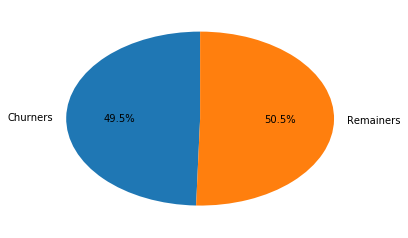

In [492]:
fig1, ax1 = plt.subplots()
ax1.pie([y_re_train[y_re_train==1].size, y_re_train[y_re_train==0].size], labels=['Churners', 'Remainers'],
        autopct='%1.1f%%', startangle=90)
plt.show()

In [201]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2500, num = 33)]
# number of features at every split
max_features = ['auto', 'sqrt']

criterion = ['entropy','gini']

# max depth
max_depth = [int(x) for x in np.linspace(5, 100, num = 10)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth,
 'criterion':criterion   
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_re_train, y_re_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.3min finished


{'max_depth': 36, 'n_estimators': 200, 'max_features': 'auto', 'criterion': 'entropy'}


## Upsampling Random Forest

93.62


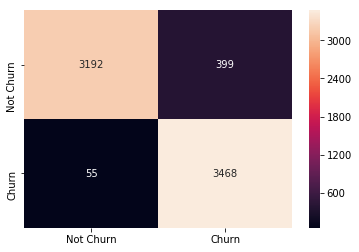

86.78


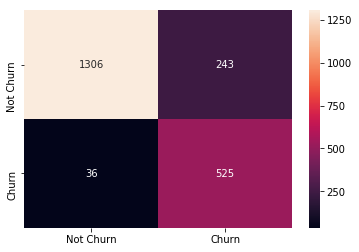

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90      1549
         1.0       0.68      0.94      0.79       561

   micro avg       0.87      0.87      0.87      2110
   macro avg       0.83      0.89      0.85      2110
weighted avg       0.90      0.87      0.87      2110



In [726]:
from sklearn.ensemble import RandomForestClassifier as RandomForest
rf = RandomForest(n_estimators = 35,
                             max_depth =12,
                             criterion = "gini", max_features='sqrt',random_state=42)

rf.fit(X_re_train, y_re_train)

y_scores_nrf=rf.fit(X_re_train, y_re_train).predict_proba(X_test)[0:,1]

y_pred_rf_train = rf.predict(X_re_train)
acc_rf =  metrics.accuracy_score(y_re_train,y_pred_rf_train) * 100
print("{:.2f}".format(acc_rf))

cnf_matrix = confusion_matrix(y_re_train, y_pred_rf_train, labels=[0,1])
# print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, xticklabels=["Not Churn","Churn"],
                yticklabels=["Not Churn","Churn"], fmt="d")
plt.show()


y_pred_rf = rf.predict(X_test)

acc_rf =  metrics.accuracy_score(y_test,y_pred_rf) * 100
print("{:.2f}".format(acc_rf))

cnf_matrix = confusion_matrix(y_test, y_pred_rf, labels=[0,1])
# print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, xticklabels=["Not Churn","Churn"],
                yticklabels=["Not Churn","Churn"], fmt="d")
plt.show()

print (classification_report(y_test, y_pred_rf))

In [478]:

from sklearn.metrics import accuracy_score,precision_score
print('F1Score of Upsampled RF: ',round(f1_score(y_test,y_pred_rf, average='weighted')*100)) 
print('Accuracy of Upsampled RF: ',round(accuracy_score(y_test,y_pred_rf)*100))
print('Precision of Upsampled RF: ',round(precision_score(y_test,y_pred_rf, average='weighted')*100))
print('Recall of Upsampled RF: ',round(recall_score(y_test,y_pred_rf, average='weighted')*100))


F1Score of Upsampled RF:  88.0
Accuracy of Upsampled RF:  87.0
Precision of Upsampled RF:  90.0
Recall of Upsampled RF:  87.0


## Random Forest - ROC Curve UpSampling vs Normal 

Text(0.5,0,'False Positive Rate')

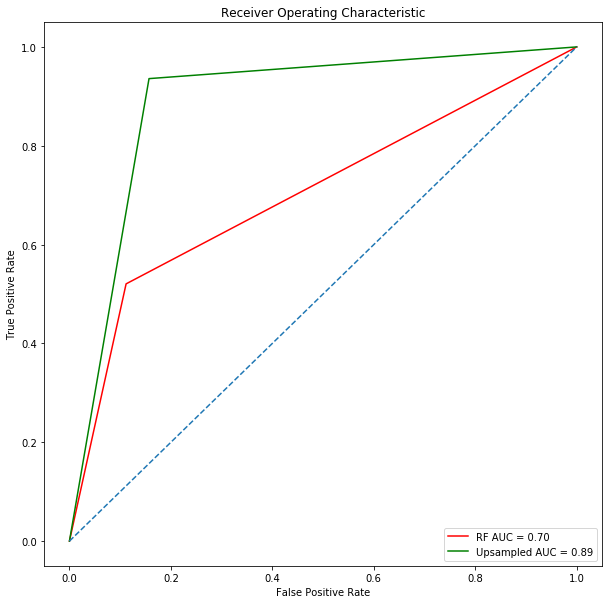

In [637]:
from sklearn.metrics import roc_curve, auc
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_pred_nrf)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc_1 = auc(fpr_1, tpr_1)
roc_auc_2 = auc(fpr_2, tpr_2)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_1,tpr_1, color='red',label = 'RF AUC = %0.2f' % roc_auc_1)
plt.plot(fpr_2,tpr_2, color='green',label = 'Upsampled AUC = %0.2f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

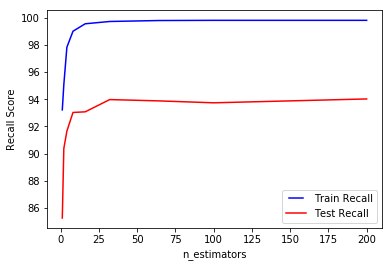

In [482]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_re_train, y_re_train)
   train_pred = rf.predict(X_re_train)

   
   train_results.append(recall_score(y_re_train, train_pred, average='weighted')*100)
   y_pred = rf.predict(X_test)

   test_results.append(recall_score(y_test, y_pred, average='weighted')*100)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train Recall")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test Recall")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall Score')
plt.xlabel('n_estimators')
plt.show()

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  if self.n_estimators == 'warn':
/Users/neerajpadarthi/anaconda3/envs/work/lib/python

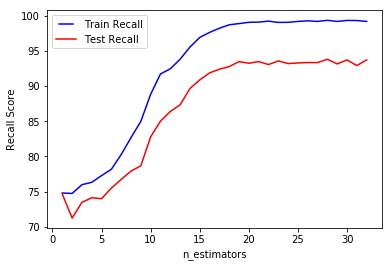

In [484]:
max_depths  = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_re_train, y_re_train)
   train_pred = rf.predict(X_re_train)

   
   train_results.append(recall_score(y_re_train, train_pred, average='weighted')*100)
   y_pred = rf.predict(X_test)

   test_results.append(recall_score(y_test, y_pred, average='weighted')*100)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train Recall")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Recall")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall Score')
plt.xlabel('n_estimators')
plt.show()

## Up Sampling - Gradient Boosting Classifier

In [731]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


num_estimators = [30,40,50,60,70,90]
learn_rates = [ 0.1]
# max_depths = [int(x) for x in np.linspace(5, 100, num = 30)]
# max_depths = [8,10,12]

param_grid = {
              'learning_rate': learn_rates}

grid_search = GridSearchCV(GradientBoostingClassifier(min_samples_split=2,max_depth=8,n_estimators=30),
                           param_grid, cv=3, return_train_score=True)
grid_search.fit(X_re_train, y_re_train)
y_scores_re_gbr = grid_search.fit(X_re_train, y_re_train).predict_proba(X_test)[0:,1]

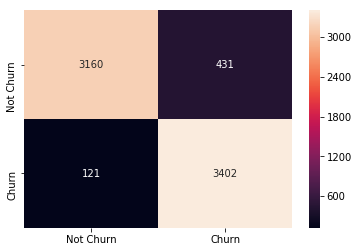

Accuracy of GBT:  92.0


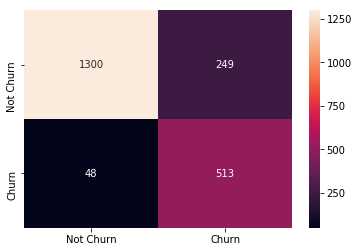

F1Score of GBT:  87.0
Accuracy of GBT:  86.0
Precision of GBT:  89.0
Recall of GBT:  86.0


In [732]:
y_pred_re_gbr = grid_search.predict(X_re_train)
cnf_matrix = confusion_matrix(y_re_train, y_pred_re_gbr, labels=[0,1])
sns.heatmap(cnf_matrix, annot=True, xticklabels=["Not Churn","Churn"],
                yticklabels=["Not Churn","Churn"], fmt="d")
plt.show()
print('Accuracy of GBT: ',round(accuracy_score(y_re_train,y_pred_re_gbr)*100))


y_pred_re_gbr = grid_search.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred_re_gbr, labels=[0,1])
sns.heatmap(cnf_matrix, annot=True, xticklabels=["Not Churn","Churn"],
                yticklabels=["Not Churn","Churn"], fmt="d")
plt.show()

from sklearn.metrics import accuracy_score,precision_score,recall_score
print('F1Score of GBT: ',round(f1_score(y_test,y_pred_re_gbr, average='weighted')*100)) 
print('Accuracy of GBT: ',round(accuracy_score(y_test,y_pred_re_gbr)*100))
print('Precision of GBT: ',round(precision_score(y_test,y_pred_re_gbr, average='weighted')*100))
print('Recall of GBT: ',round(recall_score(y_test,y_pred_re_gbr, average='weighted')*100))


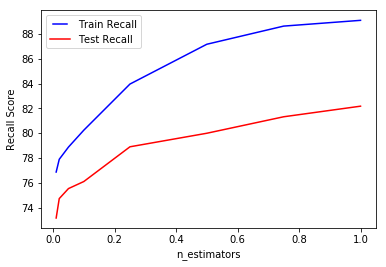

In [493]:
learn_rates = [0.01, 0.02, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
train_results = []
test_results = []
for learning_rate in learn_rates:
   rf = GradientBoostingClassifier(learning_rate=learning_rate)
   rf.fit(X_re_train, y_re_train)
   train_pred = rf.predict(X_re_train)

   
   train_results.append(recall_score(y_re_train, train_pred, average='weighted')*100)
   y_pred = rf.predict(X_test)

   test_results.append(recall_score(y_test, y_pred, average='weighted')*100)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learn_rates, train_results, 'b', label="Train Recall")
line2, = plt.plot(learn_rates, test_results, 'r', label="Test Recall")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall Score')
plt.xlabel('n_estimators')
plt.show()

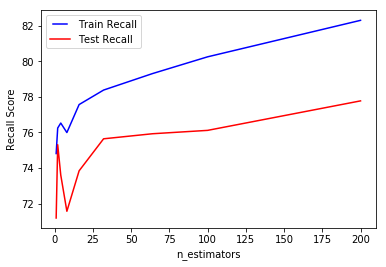

In [494]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = GradientBoostingClassifier(n_estimators=estimator)
   rf.fit(X_re_train, y_re_train)
   train_pred = rf.predict(X_re_train)

   
   train_results.append(recall_score(y_re_train, train_pred, average='weighted')*100)
   y_pred = rf.predict(X_test)

   test_results.append(recall_score(y_test, y_pred, average='weighted')*100)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train Recall")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test Recall")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall Score')
plt.xlabel('n_estimators')
plt.show()

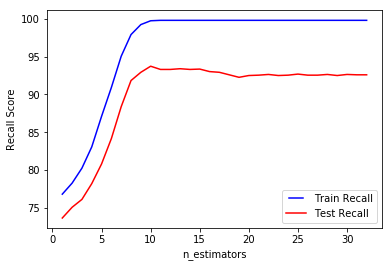

In [495]:
max_depths  = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = GradientBoostingClassifier(max_depth=max_depth)
   rf.fit(X_re_train, y_re_train)
   train_pred = rf.predict(X_re_train)

   
   train_results.append(recall_score(y_re_train, train_pred, average='weighted')*100)
   y_pred = rf.predict(X_test)

   test_results.append(recall_score(y_test, y_pred, average='weighted')*100)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train Recall")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Recall")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Recall Score')
plt.xlabel('n_estimators')
plt.show()

In [382]:
mdf1= pd.DataFrame(columns=['Type','Accuracy','Precision','F1Score'])
mdf1['Type'] =['Logistic Regression']
mdf1['Accuracy'] = [79.0]
mdf1['Precision'] = [80.0]
mdf1['F1Score'] = [79.0]
mdf1['Recall'] = [80.0]
mdf1.head()

,Type,Accuracy,Precision,F1Score,Recall
0,Logistic Regression,79.0,80.0,79.0,80.0


In [389]:
 mdf2= pd.DataFrame(columns=['Type','Accuracy','Precision','F1Score'])
mdf2['Type'] =['SVM']
mdf2['Accuracy'] = [79.0]
mdf2['Precision'] = [79.0]
mdf2['F1Score'] = [79.0]
mdf2['Recall'] = [80.0]
mdf2.head()

,Type,Accuracy,Precision,F1Score,Recall
0,SVM,79.0,79.0,79.0,80.0


In [420]:
mdf3= pd.DataFrame(columns=['Type','Accuracy','Precision','F1Score'])
mdf3['Type'] =['Random Forest']
mdf3['Accuracy'] = [78.0]
mdf3['Precision'] = [79.0]
mdf3['F1Score'] = [78.0]
mdf3['Recall'] = [79.0]
mdf3.head()

,Type,Accuracy,Precision,F1Score,Recall
0,Random Forest,78.0,79.0,78.0,79.0


In [481]:
mdf= pd.DataFrame(columns=['Type','Accuracy','Precision','F1Score'])
mdf['Type'] =['UpSampled Random Forest']
mdf['Accuracy'] = [87.0]
mdf['Precision'] = [89.0]
mdf['F1Score'] = [88.0]
mdf['Recall'] = [87.0]

In [513]:
mdf4= pd.DataFrame(columns=['Type','Accuracy','Precision','F1Score','Recall'])
mdf4['Type'] =['Gradient Boosting Trees']
mdf4['Accuracy'] = [79.0]
mdf4['Precision'] = [80.0]
mdf4['F1Score'] = [79.0]
mdf4['Recall'] = [80.0]

In [511]:
mdf5= pd.DataFrame(columns=['Type','Accuracy','Precision','F1Score','Recall'])
mdf5['Type'] =['UpSampled Gradient Boosting Trees']
mdf5['Accuracy'] = [86.0]
mdf5['Precision'] = [87.0]
mdf5['F1Score'] = [88.0]
mdf5['Recall'] = [86.0]

In [553]:
mdf6= pd.DataFrame(columns=['Type','Accuracy','Precision','F1Score','Recall'])
mdf6['Type'] =['MLP']
mdf6['Accuracy'] = [80.0]
mdf6['Precision'] = [79.0]
mdf6['F1Score'] = [79.0]
mdf6['Recall'] = [80.0]

In [609]:
mdf7= pd.DataFrame(columns=['Type','Accuracy','Precision','F1Score','Recall'])
mdf7['Type'] =['UpSampled MLP']
mdf7['Accuracy'] = [85.0]
mdf7['Precision'] = [87.0]
mdf7['F1Score'] = [86.0]
mdf7['Recall'] = [85.0]

In [610]:
frames=[mdf,mdf1,mdf2,mdf3,mdf4,mdf5,mdf6,mdf7]
mfinal = pd.concat(frames)

In [628]:
mfinal.head(10)
mfinal=mfinal.set_index('Type')

,Accuracy,Precision,F1Score,Recall
Type,,,,
Random Forest,78.0,79.0,78.0,79.0
Logistic Regression,79.0,80.0,79.0,80.0
SVM,79.0,79.0,79.0,80.0
Gradient Boosting Trees,79.0,80.0,79.0,80.0
MLP,80.0,79.0,79.0,80.0
UpSampled MLP,85.0,87.0,86.0,85.0
UpSampled Gradient Boosting Trees,86.0,87.0,88.0,86.0
Upsampled Random Forest,87.0,89.0,88.0,87.0


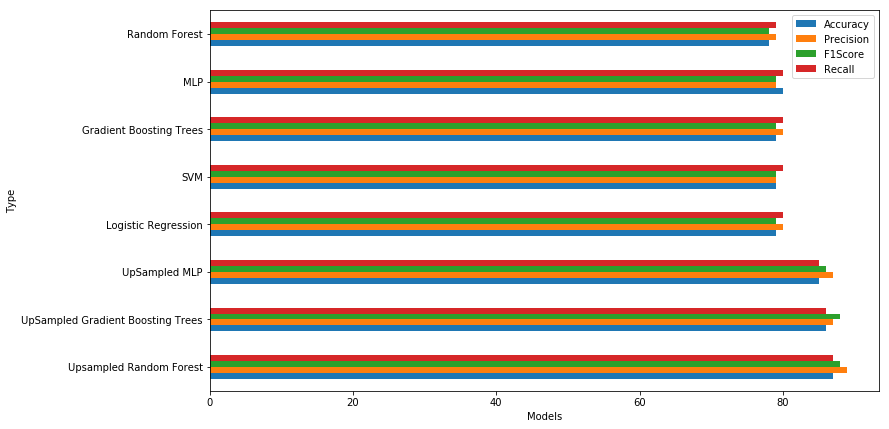

In [635]:
mfinal = mfinal.sort_values('Recall',ascending=False)
mfinal.plot(kind='barh',figsize=(12,7))
plt.xlabel('Models') # add to x-label to the plot
plt.show()

In [634]:
sns.barplot(y=mfinal_f1score.Type, x=mfinal_f1score, palette="pastel", orient='h')s

SyntaxError: invalid syntax (<ipython-input-634-ad7b5fd77d7b>, line 1)

Text(0.5,0,'False Positive Rate')

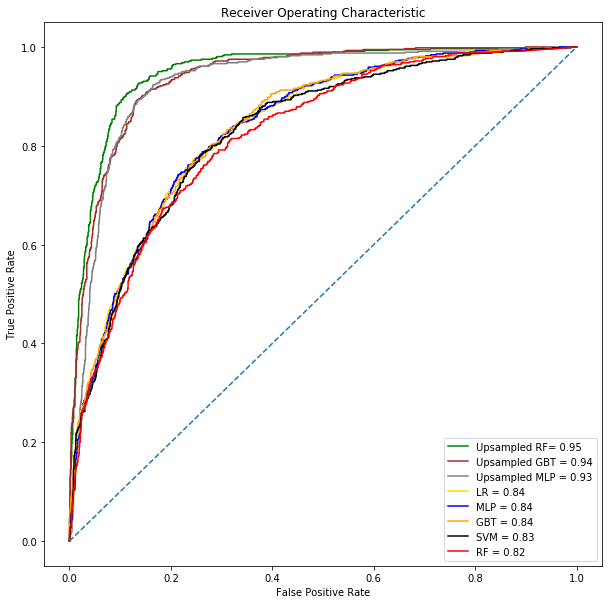

In [737]:
from sklearn.metrics import roc_curve, auc
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_scores_rf)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_scores_nrf)
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_scores_mlp)
fpr_4, tpr_4, thresholds = roc_curve(y_test, y_scores_re_mlp)
fpr_5, tpr_5, thresholds = roc_curve(y_test, y_scores_re_gbr)
fpr_6, tpr_6, thresholds = roc_curve(y_test, y_scores_gbr)
fpr_7, tpr_7, thresholds = roc_curve(y_test, y_scores_svm)
fpr_8, tpr_8, thresholds = roc_curve(y_test, y_scores_lr)



roc_auc_1 = auc(fpr_1, tpr_1)
roc_auc_2 = auc(fpr_2, tpr_2)
roc_auc_3 = auc(fpr_3, tpr_3)
roc_auc_4 = auc(fpr_4, tpr_4)
roc_auc_5 = auc(fpr_5, tpr_5)
roc_auc_6 = auc(fpr_6, tpr_6)
roc_auc_7 = auc(fpr_7, tpr_7)
roc_auc_8 = auc(fpr_8, tpr_8)




import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_2,tpr_2, color='green',label = 'Upsampled RF= %0.2f' % roc_auc_2)
plt.plot(fpr_5,tpr_5, color='brown',label = 'Upsampled GBT = %0.2f' % roc_auc_5)
plt.plot(fpr_4,tpr_4, color='grey',label = 'Upsampled MLP = %0.2f' % roc_auc_4)
plt.plot(fpr_8,tpr_8, color='gold',label = 'LR = %0.2f' % roc_auc_8)
plt.plot(fpr_3,tpr_3, color='blue',label = 'MLP = %0.2f' % roc_auc_3)
plt.plot(fpr_6,tpr_6, color='orange',label = 'GBT = %0.2f' % roc_auc_6)
plt.plot(fpr_7,tpr_7, color='black',label = 'SVM = %0.2f' % roc_auc_7)
plt.plot(fpr_1,tpr_1, color='red',label = 'RF = %0.2f' % roc_auc_1)



plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [204]:
!pip install imblearn

  Using cached https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e5/4c/7557e1c2e791bd43878f8c82065bddc5798252084f26ef44527c02262af1/imbalanced_learn-0.4.3-py3-none-any.whl


The shape of the training set after the SMOTE oversampling = (7228, 25)


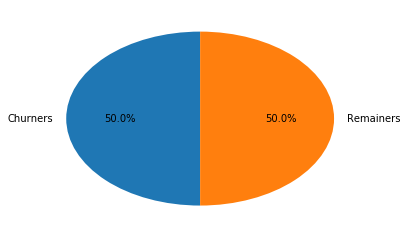

In [208]:
# Apply the SMOTE oversampling to the training data
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='auto', kind='regular')
X_SM_train, y_SM_train = sm.fit_sample(X_train, y_train)
print('The shape of the training set after the SMOTE oversampling = ' + str(X_SM_train.shape))
fig1, ax1 = plt.subplots()
ax1.pie([y_SM_train[y_SM_train==1].size, y_SM_train[y_SM_train==0].size], labels=['Churners', 'Remainers'],
        autopct='%1.1f%%', startangle=90)
plt.show()


X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(df_upsampled[df_re_rank.loc[df_re_rank['Ranking']<=25]['Column_Name']],
                                                    df_upsampled.iloc[:,32], test_size=0.30,random_state=42)

In [841]:
# Create logistic regression instance
logistic = LogisticRegression()
# Regularization penalty space
penalty = ['l1', 'l2']
# Regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search using 10-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=10, scoring='accuracy' ,n_jobs=-1)
# Fit grid search
print(clf)
best_model = clf.fit(X_SM_train, y_SM_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)
Best Penalty: l1
Best C: 1.0


/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [847]:
y_train_GCV = best_model.predict(X_SM_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(best_model.score(X_SM_train, y_SM_train)))

y_pred_GCV = best_model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(best_model.score(X_test, y_test)))



Accuracy of logistic regression classifier on train set: 0.77
Accuracy of logistic regression classifier on test set: 0.74


[[1125  424]
 [ 116  445]]


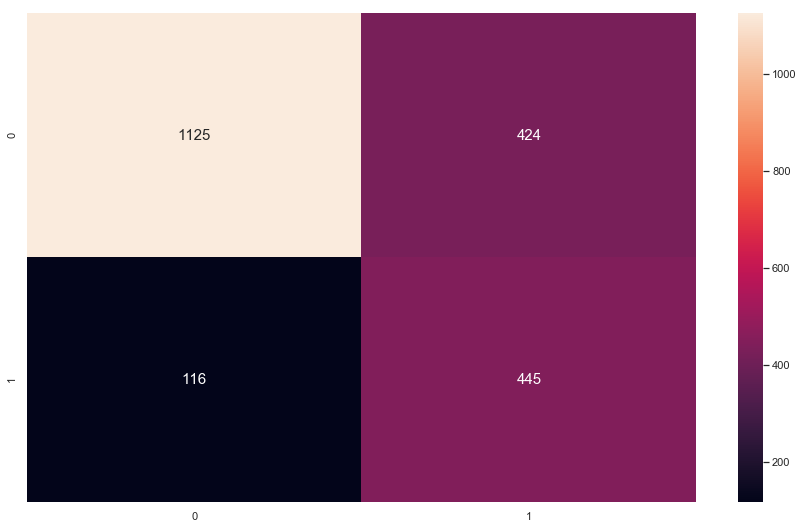

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1549
         1.0       0.64      0.53      0.58       561

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [848]:
lr_conf = confusion_matrix(y_test, y_pred_GCV)
print(lr_conf)
sns.heatmap(lr_conf, annot=True, fmt="d")
plt.show()
print(classification_report( y_test, y_pred))

In [849]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred_GCV, average='weighted')) 

from sklearn.metrics import roc_auc_score
print('AUROC: ' + str(roc_auc_score(y_test, y_pred_GCV)))

0.7575106135265132
AUROC: 0.7597506988005602


[2. 1. 0.]


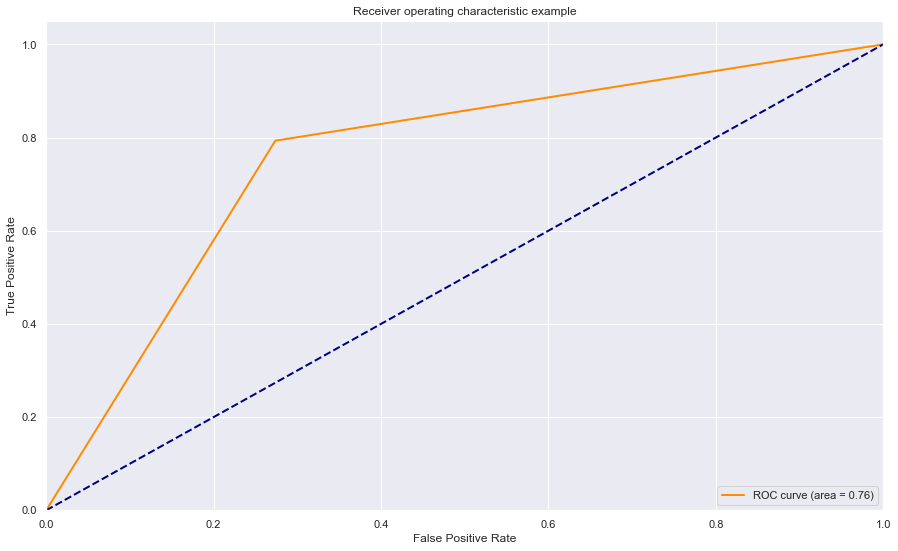

In [850]:
from sklearn.metrics import roc_auc_score,roc_curve,scorer,auc
fpr, tpr, thres = roc_curve(y_test, y_pred_GCV)
print(thres)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [255]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 130, num = 33)]
# number of features at every split
max_features = ['auto', 'sqrt']

criterion = ['entropy','gini']

# max depth
max_depth = [int(x) for x in np.linspace(7, 20, num = 10)]
max_depth.append(None)

min_samples_leaf = [0.28,0.30,0.32,0.34,0.36]
# create random grid

min_samples_split= [0.3,0.5,0.7,0.9]

max_feature =[7,8,9,10,11,12,13]

random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth,
 'criterion':criterion,
    'min_samples_leaf':min_samples_leaf,
    'min_samples_split':min_samples_split,
    'max_features':max_feature
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the model
rfc_random.fit(X_SM_train, y_SM_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] max_depth=11, min_samples_split=0.7, n_estimators=88, min_samples_leaf=0.36, max_features=9, criterion=entropy 
[CV]  max_depth=11, min_samples_split=0.7, n_estimators=88, min_samples_leaf=0.36, max_features=9, criterion=entropy, total=   0.1s
[CV] max_depth=11, min_samples_split=0.7, n_estimators=88, min_samples_leaf=0.36, max_features=9, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=11, min_samples_split=0.7, n_estimators=88, min_samples_leaf=0.36, max_features=9, criterion=entropy, total=   0.1s
[CV] max_depth=11, min_samples_split=0.7, n_estimators=88, min_samples_leaf=0.36, max_features=9, criterion=entropy 
[CV]  max_depth=11, min_samples_split=0.7, n_estimators=88, min_samples_leaf=0.36, max_features=9, criterion=entropy, total=   0.1s
[CV] max_depth=7, min_samples_split=0.7, n_estimators=17, min_samples_leaf=0.3, max_features=8, criterion=entropy 
[CV]  max_depth=7, min_samples_split=0.7, n_estimators=17, min_samples_leaf=0.3, max_features=8, criterion=entropy, total=   0.0s
[CV] max_depth=7, min_samples_split=0.7, n_estimators=17, min_samples_leaf=0.3, max_features=8, criterion=entropy 
[CV]  max_depth=7, min_samples_split=0.7, n_estimators=17, min_samples_leaf=0.3, max_features=8, criterion=entropy, total=   0.0s
[CV] max_depth=7, min_samples_split=0.7, n_estimators=17, min_samples_leaf=0.3, max_features=8, criterion=entropy 
[CV]  max_dept

[CV]  max_depth=11, min_samples_split=0.3, n_estimators=40, min_samples_leaf=0.3, max_features=7, criterion=gini, total=   0.1s
[CV] max_depth=11, min_samples_split=0.3, n_estimators=40, min_samples_leaf=0.3, max_features=7, criterion=gini 
[CV]  max_depth=11, min_samples_split=0.3, n_estimators=40, min_samples_leaf=0.3, max_features=7, criterion=gini, total=   0.1s
[CV] max_depth=11, min_samples_split=0.3, n_estimators=40, min_samples_leaf=0.3, max_features=7, criterion=gini 
[CV]  max_depth=11, min_samples_split=0.3, n_estimators=40, min_samples_leaf=0.3, max_features=7, criterion=gini, total=   0.1s
[CV] max_depth=7, min_samples_split=0.9, n_estimators=47, min_samples_leaf=0.28, max_features=8, criterion=entropy 
[CV]  max_depth=7, min_samples_split=0.9, n_estimators=47, min_samples_leaf=0.28, max_features=8, criterion=entropy, total=   0.0s
[CV] max_depth=7, min_samples_split=0.9, n_estimators=47, min_samples_leaf=0.28, max_features=8, criterion=entropy 
[CV]  max_depth=7, min_samp

[CV]  max_depth=12, min_samples_split=0.9, n_estimators=103, min_samples_leaf=0.36, max_features=10, criterion=gini, total=   0.1s
[CV] max_depth=20, min_samples_split=0.7, n_estimators=92, min_samples_leaf=0.36, max_features=7, criterion=gini 
[CV]  max_depth=20, min_samples_split=0.7, n_estimators=92, min_samples_leaf=0.36, max_features=7, criterion=gini, total=   0.1s
[CV] max_depth=20, min_samples_split=0.7, n_estimators=92, min_samples_leaf=0.36, max_features=7, criterion=gini 
[CV]  max_depth=20, min_samples_split=0.7, n_estimators=92, min_samples_leaf=0.36, max_features=7, criterion=gini, total=   0.1s
[CV] max_depth=20, min_samples_split=0.7, n_estimators=92, min_samples_leaf=0.36, max_features=7, criterion=gini 
[CV]  max_depth=20, min_samples_split=0.7, n_estimators=92, min_samples_leaf=0.36, max_features=7, criterion=gini, total=   0.1s
[CV] max_depth=14, min_samples_split=0.5, n_estimators=73, min_samples_leaf=0.36, max_features=10, criterion=entropy 
[CV]  max_depth=14, mi

[CV]  max_depth=11, min_samples_split=0.3, n_estimators=51, min_samples_leaf=0.3, max_features=10, criterion=gini, total=   0.1s
[CV] max_depth=11, min_samples_split=0.3, n_estimators=51, min_samples_leaf=0.3, max_features=10, criterion=gini 
[CV]  max_depth=11, min_samples_split=0.3, n_estimators=51, min_samples_leaf=0.3, max_features=10, criterion=gini, total=   0.1s
[CV] max_depth=11, min_samples_split=0.3, n_estimators=51, min_samples_leaf=0.3, max_features=10, criterion=gini 
[CV]  max_depth=11, min_samples_split=0.3, n_estimators=51, min_samples_leaf=0.3, max_features=10, criterion=gini, total=   0.1s
[CV] max_depth=15, min_samples_split=0.3, n_estimators=21, min_samples_leaf=0.36, max_features=12, criterion=entropy 
[CV]  max_depth=15, min_samples_split=0.3, n_estimators=21, min_samples_leaf=0.36, max_features=12, criterion=entropy, total=   0.0s
[CV] max_depth=15, min_samples_split=0.3, n_estimators=21, min_samples_leaf=0.36, max_features=12, criterion=entropy 
[CV]  max_depth=

[CV]  max_depth=14, min_samples_split=0.5, n_estimators=70, min_samples_leaf=0.28, max_features=7, criterion=gini, total=   0.1s
[CV] max_depth=14, min_samples_split=0.5, n_estimators=70, min_samples_leaf=0.28, max_features=7, criterion=gini 
[CV]  max_depth=14, min_samples_split=0.5, n_estimators=70, min_samples_leaf=0.28, max_features=7, criterion=gini, total=   0.1s
[CV] max_depth=20, min_samples_split=0.9, n_estimators=17, min_samples_leaf=0.28, max_features=9, criterion=entropy 
[CV]  max_depth=20, min_samples_split=0.9, n_estimators=17, min_samples_leaf=0.28, max_features=9, criterion=entropy, total=   0.0s
[CV] max_depth=20, min_samples_split=0.9, n_estimators=17, min_samples_leaf=0.28, max_features=9, criterion=entropy 
[CV]  max_depth=20, min_samples_split=0.9, n_estimators=17, min_samples_leaf=0.28, max_features=9, criterion=entropy, total=   0.0s
[CV] max_depth=20, min_samples_split=0.9, n_estimators=17, min_samples_leaf=0.28, max_features=9, criterion=entropy 
[CV]  max_dep

[CV]  max_depth=12, min_samples_split=0.5, n_estimators=62, min_samples_leaf=0.3, max_features=7, criterion=gini, total=   0.1s
[CV] max_depth=12, min_samples_split=0.5, n_estimators=62, min_samples_leaf=0.3, max_features=7, criterion=gini 
[CV]  max_depth=12, min_samples_split=0.5, n_estimators=62, min_samples_leaf=0.3, max_features=7, criterion=gini, total=   0.1s
[CV] max_depth=12, min_samples_split=0.5, n_estimators=62, min_samples_leaf=0.3, max_features=7, criterion=gini 
[CV]  max_depth=12, min_samples_split=0.5, n_estimators=62, min_samples_leaf=0.3, max_features=7, criterion=gini, total=   0.1s
[CV] max_depth=18, min_samples_split=0.9, n_estimators=55, min_samples_leaf=0.32, max_features=9, criterion=gini 
[CV]  max_depth=18, min_samples_split=0.9, n_estimators=55, min_samples_leaf=0.32, max_features=9, criterion=gini, total=   0.1s
[CV] max_depth=18, min_samples_split=0.9, n_estimators=55, min_samples_leaf=0.32, max_features=9, criterion=gini 
[CV]  max_depth=18, min_samples_s

[CV]  max_depth=12, min_samples_split=0.5, n_estimators=122, min_samples_leaf=0.36, max_features=9, criterion=gini, total=   0.1s
[CV] max_depth=11, min_samples_split=0.7, n_estimators=111, min_samples_leaf=0.32, max_features=8, criterion=gini 
[CV]  max_depth=11, min_samples_split=0.7, n_estimators=111, min_samples_leaf=0.32, max_features=8, criterion=gini, total=   0.1s
[CV] max_depth=11, min_samples_split=0.7, n_estimators=111, min_samples_leaf=0.32, max_features=8, criterion=gini 
[CV]  max_depth=11, min_samples_split=0.7, n_estimators=111, min_samples_leaf=0.32, max_features=8, criterion=gini, total=   0.1s
[CV] max_depth=11, min_samples_split=0.7, n_estimators=111, min_samples_leaf=0.32, max_features=8, criterion=gini 
[CV]  max_depth=11, min_samples_split=0.7, n_estimators=111, min_samples_leaf=0.32, max_features=8, criterion=gini, total=   0.1s
[CV] max_depth=18, min_samples_split=0.9, n_estimators=32, min_samples_leaf=0.28, max_features=7, criterion=entropy 
[CV]  max_depth=18

[CV]  max_depth=8, min_samples_split=0.3, n_estimators=81, min_samples_leaf=0.3, max_features=7, criterion=gini, total=   0.1s
[CV] max_depth=8, min_samples_split=0.3, n_estimators=81, min_samples_leaf=0.3, max_features=7, criterion=gini 
[CV]  max_depth=8, min_samples_split=0.3, n_estimators=81, min_samples_leaf=0.3, max_features=7, criterion=gini, total=   0.1s
[CV] max_depth=18, min_samples_split=0.5, n_estimators=81, min_samples_leaf=0.28, max_features=10, criterion=gini 
[CV]  max_depth=18, min_samples_split=0.5, n_estimators=81, min_samples_leaf=0.28, max_features=10, criterion=gini, total=   0.1s
[CV] max_depth=18, min_samples_split=0.5, n_estimators=81, min_samples_leaf=0.28, max_features=10, criterion=gini 
[CV]  max_depth=18, min_samples_split=0.5, n_estimators=81, min_samples_leaf=0.28, max_features=10, criterion=gini, total=   0.1s
[CV] max_depth=18, min_samples_split=0.5, n_estimators=81, min_samples_leaf=0.28, max_features=10, criterion=gini 
[CV]  max_depth=18, min_sampl

[CV]  max_depth=8, min_samples_split=0.9, n_estimators=100, min_samples_leaf=0.36, max_features=12, criterion=entropy, total=   0.1s
[CV] max_depth=8, min_samples_split=0.9, n_estimators=100, min_samples_leaf=0.36, max_features=12, criterion=entropy 
[CV]  max_depth=8, min_samples_split=0.9, n_estimators=100, min_samples_leaf=0.36, max_features=12, criterion=entropy, total=   0.1s
[CV] max_depth=8, min_samples_split=0.9, n_estimators=100, min_samples_leaf=0.36, max_features=12, criterion=entropy 
[CV]  max_depth=8, min_samples_split=0.9, n_estimators=100, min_samples_leaf=0.36, max_features=12, criterion=entropy, total=   0.1s
[CV] max_depth=18, min_samples_split=0.3, n_estimators=115, min_samples_leaf=0.34, max_features=8, criterion=entropy 
[CV]  max_depth=18, min_samples_split=0.3, n_estimators=115, min_samples_leaf=0.34, max_features=8, criterion=entropy, total=   0.1s
[CV] max_depth=18, min_samples_split=0.3, n_estimators=115, min_samples_leaf=0.34, max_features=8, criterion=entro

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   32.1s finished


In [311]:
from sklearn.ensemble import RandomForestClassifier as RandomForest
rf = RandomForest(n_estimators = 107,
                             max_depth =10,
                             criterion = "entropy",
#                   max_features=7,min_samples_split= 0.2,min_samples_leaf= 0.28,random_state=42
                  )

# rfc = RandomForestClassifier(n_estimators=200, max_depth=100, max_features='sqrt')

rf.fit(X_SM_train, y_SM_train)

y_pred_srf = rf.predict(X_SM_train)
acc_rf =  metrics.accuracy_score(y_SM_train,y_pred_srf) * 100
print("{:.2f}".format(acc_rf))
print(classification_report( y_SM_train, y_pred_srf))
lr_conf = confusion_matrix(y_SM_train, y_pred_srf)
print(lr_conf)



y_pred_srf = rf.predict(X_test)
acc_rf =  metrics.accuracy_score(y_test,y_pred_srf) * 100
print("{:.2f}".format(acc_rf))
print(classification_report( y_test, y_pred_srf))
lr_conf = confusion_matrix(y_test, y_pred_srf)
print(lr_conf)

print (y_pred_srf[0:5])
print (y_test[0:5])

# [[1125  424]
#  [ 116  445]]

87.40
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87      3614
         1.0       0.84      0.93      0.88      3614

   micro avg       0.87      0.87      0.87      7228
   macro avg       0.88      0.87      0.87      7228
weighted avg       0.88      0.87      0.87      7228

[[2961  653]
 [ 258 3356]]
76.02
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.82      1549
         1.0       0.54      0.74      0.62       561

   micro avg       0.76      0.76      0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.76      0.77      2110

[[1189  360]
 [ 146  415]]
[0. 0. 1. 0. 0.]
2481    0.0
6784    0.0
6125    1.0
3052    0.0
4099    0.0
Name: churn, dtype: float64


## MLP Classifier

In [734]:
X_train, X_test, y_train, y_test = train_test_split(telcom_df.iloc[:,0:32],
                                                    telcom_df.iloc[:,32], test_size=0.30,random_state=42)
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(df_upsampled.iloc[:,:32],
                                                    df_upsampled.iloc[:,32], test_size=0.30,random_state=42)

from sklearn.neural_network import MLPClassifier


parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,100,)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# {'alpha': 0.0001, 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'activation': 'logistic', 'solver': 'adam'}


clf_mlp = MLPClassifier()
clf_mlp.fit(X_train, y_train)

mlp = MLPClassifier(max_iter=100)

clf = GridSearchCV(mlp, parameter_space, cv=3)
y_scores_mlp_lt=clf.fit(X_train, y_train)
y_scores_mlp=y_scores_mlp_lt.predict_proba(X_test)[:,1]
print('Best parameters found:\n', clf.best_params_)

clf_mlp_re = MLPClassifier()
clf_mlp_re.fit(X_re_train, y_re_train)

mlp_re = MLPClassifier(max_iter=100)

clf_re = GridSearchCV(mlp_re, parameter_space, cv=3)
y_scores_re_mlp_lt=clf_re.fit(X_re_train, y_re_train)
y_scores_re_mlp=y_scores_re_mlp_lt.predict_proba(X_test)[:,1]

print('Best parameters found re:\n', clf_re.best_params_)

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

Best parameters found:
 {'alpha': 0.0001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100), 'activation': 'logistic', 'solver': 'adam'}


/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

Best parameters found re:
 {'alpha': 0.05, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu', 'solver': 'adam'}


/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [548]:

# Best parameters found:
#  {'alpha': 0.0001, 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'activation': 'logistic', 'solver': 'adam'}

y_pred_mlp_t = clf_mlp.predict(X_train)
y_pre_mlp_t = clf.predict(X_train)

y_pred_mlp = clf_mlp.predict(X_test)
y_pre_mlp = clf.predict(X_test)


acc_mlp_t = accuracy_score(y_train, y_pred_mlp_t)
acc_ml_t = accuracy_score(y_train, y_pre_mlp_t)

acc_mlp = accuracy_score(y_test, y_pred_mlp)
acc_ml = accuracy_score(y_test, y_pre_mlp)

print(acc_mlp_t)
print(acc_mlp)
print(acc_ml_t)
print(acc_ml)

print("************")

y_pred_mlp_t_re = clf_mlp_re.predict(X_re_train)
y_pre_mlp_t_re = clf_re.predict(X_re_train)

y_pred_mlp_re = clf_mlp_re.predict(X_test)
y_pre_mlp_re = clf_re.predict(X_test)

acc_mlp_t_re = accuracy_score(y_re_train, y_pred_mlp_t_re)
acc_ml_t_re = accuracy_score(y_re_train, y_pre_mlp_t_re)

acc_mlp_re = accuracy_score(y_test, y_pred_mlp_re)
acc_ml_re = accuracy_score(y_test, y_pre_mlp_re)

print(acc_mlp_t_re)
print(acc_mlp_re)
print(acc_ml_t_re)
print(acc_ml_re)


0.8543275091426249
0.7739336492890996
0.8035351483136937
0.7962085308056872
************
0.8629463030643801
0.8146919431279621
0.9283103739105988
0.8511848341232228


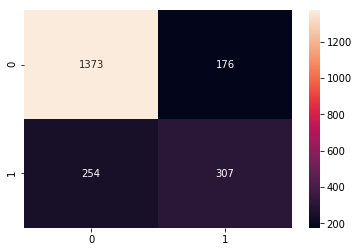

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1549
         1.0       0.64      0.55      0.59       561

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110

F1Score of MLP:  79.0
Accuracy of MLP:  80.0
Precision of MLP:  79.0
Recall of MLP:  80.0


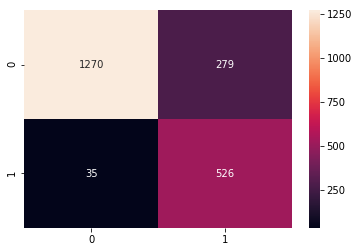

              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89      1549
         1.0       0.65      0.94      0.77       561

   micro avg       0.85      0.85      0.85      2110
   macro avg       0.81      0.88      0.83      2110
weighted avg       0.89      0.85      0.86      2110

F1Score of MLP:  86.0
Accuracy of MLP:  85.0
Precision of MLP:  89.0
Recall of MLP:  85.0


In [735]:
lr_conf = confusion_matrix(y_test, y_pre_mlp)
sns.heatmap(lr_conf, annot=True, fmt="d")
plt.show()
print(classification_report( y_test, y_pre_mlp))

from sklearn.metrics import accuracy_score,precision_score,recall_score
print('F1Score of MLP: ',round(f1_score(y_test,y_pre_mlp, average='weighted')*100)) 
print('Accuracy of MLP: ',round(accuracy_score(y_test,y_pre_mlp)*100))
print('Precision of MLP: ',round(precision_score(y_test,y_pre_mlp, average='weighted')*100))
print('Recall of MLP: ',round(recall_score(y_test,y_pre_mlp, average='weighted')*100))

lr_conf = confusion_matrix(y_test, y_pre_mlp_re)
sns.heatmap(lr_conf, annot=True, fmt="d")
plt.show()
print(classification_report( y_test, y_pre_mlp_re))

from sklearn.metrics import accuracy_score,precision_score,recall_score
print('F1Score of MLP: ',round(f1_score(y_test,y_pre_mlp_re, average='weighted')*100)) 
print('Accuracy of MLP: ',round(accuracy_score(y_test,y_pre_mlp_re)*100))
print('Precision of MLP: ',round(precision_score(y_test,y_pre_mlp_re, average='weighted')*100))
print('Recall of MLP: ',round(recall_score(y_test,y_pre_mlp_re, average='weighted')*100))